## DSND Project1 

#### DataSets Used:

**For this project two datasets were used**
- Seattle AirBNB Data
- Boston AirBNB Data



#### Problem statment:-
- What features have the highest corrilation with the price
- Can we generlize that if a property is at a certin location it will effect the price


***
***

In [1]:
#Imports
import pandas as pd 
import numpy as np 
import sklearn

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#pd.set_option('display.max_rows', 20)

## Data Understaning

#### Boston

In [2]:
#Reading the data
boston_listing = pd.read_csv('data/boston/listings.csv')

In [3]:
#understanding the data
boston_listing.columns , boston_listing.shape

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'access', 'interaction', 'house_rules',
        'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
        'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
        'host_about', 'host_response_time', 'host_response_rate',
        'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
        'host_picture_url', 'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'street',
        'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
     

In [4]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
# overall null values in boston dataset
boston_listing.isnull().sum().sum()

50229

In [6]:
# make a column to identify the city before merging
boston_listing['city'].fillna('boston',inplace=True)
boston_listing['city'].value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Brighton                       15
Charlestown                    15
Dorchester                     15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
East Boston                     3
Mattapan                        3
boston                          3
Hyde Park                       2
South Boston                    2
ALLSTON                         2
Boston, Massachusetts, US       2
Jamaica Plain                   2
Jamaica Plain, Boston           2
Milton                          1
Jamaica Plain, MA               1
South End, Boston               1
Boston (Charlestown)            1
Roslindale, Boston              1
波士顿                             1
Newton                          1
dorchester, bo

### seattle

In [7]:
#reading the data
seattle_listing = pd.read_csv('data/seattle/listings.csv')

In [8]:
#getting some info
seattle_listing.columns , seattle_listing.shape

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_location', 'host_about', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 

In [9]:
# get the overall missing values seattle dataset
seattle_listing.isnull().sum().sum()

29819

In [10]:
# make a column to identify the city before merging
seattle_listing['city'].fillna('seattle',inplace=True)
seattle_listing['city'].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
西雅图                         1
Phinney Ridge Seattle       1
Ballard, Seattle            1
seattle                     1
Name: city, dtype: int64

In [11]:
# visulizing the missing values before merging
def missing_heat_map(DataFrame):
        import numpy as np
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set_style('whitegrid')
        
        
    # plot the missing values
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
        sns.heatmap(DataFrame.isnull(), yticklabels=False, ax = ax, cbar=False,\
                    cmap='viridis')
        ax.set_title('dataset')
        plt.show()
        
    # Calculate the missing values to get a percentage 

        for i in DataFrame:
            print(i,': %',int((DataFrame[i].isnull().sum()/len(DataFrame[i]))*100),\
                  'With {} missing values'.format((DataFrame[i].isnull().sum())))


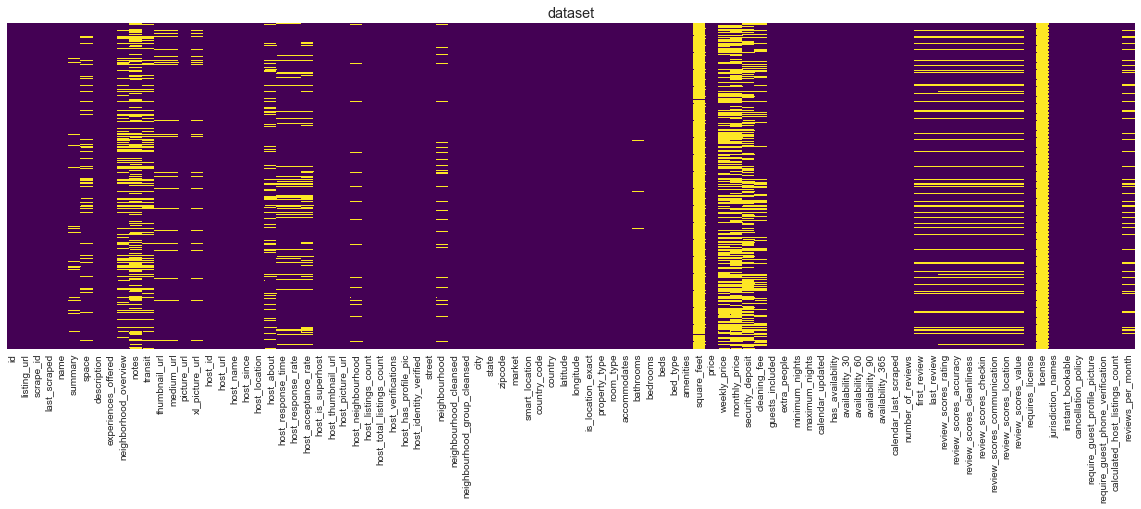

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 4 With 177 missing values
space : % 14 With 569 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 27 With 1032 missing values
notes : % 42 With 1606 missing values
transit : % 24 With 934 missing values
thumbnail_url : % 8 With 320 missing values
medium_url : % 8 With 320 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 8 With 320 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 2 missing values
host_since : % 0 With 2 missing values
host_location : % 0 With 8 missing values
host_about : % 22 With 859 missing values
host_response_time : % 13 With 523 missing values
host_response_rate : % 13 With 523 missing values
host_acceptance_rat

In [12]:
# Understand the missing values for seattle dataset
missing_heat_map(seattle_listing)

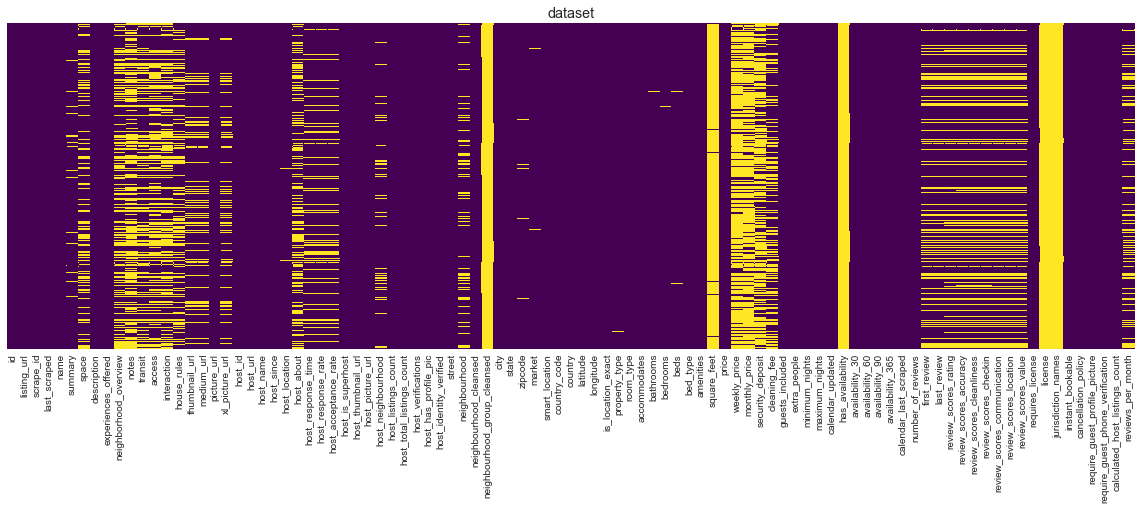

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 3 With 143 missing values
space : % 29 With 1057 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 39 With 1415 missing values
notes : % 55 With 1975 missing values
transit : % 35 With 1290 missing values
access : % 41 With 1489 missing values
interaction : % 43 With 1554 missing values
house_rules : % 33 With 1192 missing values
thumbnail_url : % 16 With 599 missing values
medium_url : % 16 With 599 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 16 With 599 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 0 missing values
host_since : % 0 With 0 missing values
host_location : % 0 With 11 missing values
host_about : % 36 With 1309 

In [13]:
# Understand the missing values for the boston dataset
missing_heat_map(boston_listing)

In [14]:
# get the column list that is in both datasets
column_list = set(seattle_listing.columns).intersection(boston_listing.columns)
column_list = list(column_list)

In [15]:
# check that the columns match before merging the two datasets 

# get the unique columns in the seattle dataset
seattle_unique = [x for x in seattle_listing if x not in column_list]
print(seattle_unique)

# get the unique columns in the boston_ls dataset
boston_unique = [x for x in boston_listing if x not in column_list]
print(boston_unique)

[]
['access', 'interaction', 'house_rules']


**This means that both datasets don't have column naming issues**

In [16]:
#Checking the unique columns in the boston dataset
boston_listing[['access','interaction','house_rules']].isnull().sum()

access         1489
interaction    1554
house_rules    1192
dtype: int64

In [17]:
# merge both datasets for an esier cleaning process
df = pd.concat([seattle_listing,boston_listing],ignore_index=True) 

In [18]:
df.shape

(7403, 95)

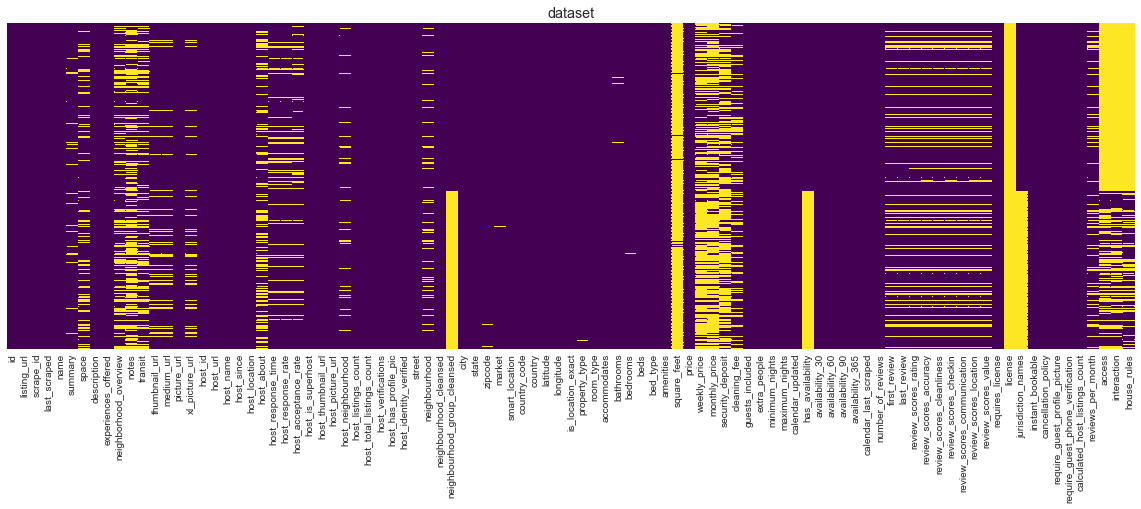

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 4 With 320 missing values
space : % 21 With 1626 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 33 With 2447 missing values
notes : % 48 With 3581 missing values
transit : % 30 With 2224 missing values
thumbnail_url : % 12 With 919 missing values
medium_url : % 12 With 919 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 12 With 919 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 2 missing values
host_since : % 0 With 2 missing values
host_location : % 0 With 19 missing values
host_about : % 29 With 2168 missing values
host_response_time : % 13 With 994 missing values
host_response_rate : % 13 With 994 missing values
host_accepta

In [19]:
#visulize the missing values of the merged dataset to start cleaning
missing_heat_map(df)

In [20]:
df.dtypes

id                                  int64
listing_url                        object
scrape_id                           int64
last_scraped                       object
name                               object
                                   ...   
calculated_host_listings_count      int64
reviews_per_month                 float64
access                             object
interaction                        object
house_rules                        object
Length: 95, dtype: object

In [21]:
df.to_csv('full_data.csv')

***
***

## Data prepreation

In [22]:
# This function will give a breif discription about the distribution of data with and without outliers
def no_outlier(Data_column,data_set):
    import math #import 
    X = data_set[Data_column] #set the dataframe
    no_outlier = [] 
    confidence = []
    
    q1 = float(X.describe()['25%']) #get the q1 from the describe function 
    q3 = float(X.describe()['75%']) #get the q3 from the describe function
    iqr = (q3 - q1)*1.5 #get the iqr
    std = float(X.describe()['std']) #get the standered deviation
    mean = float(X.describe()['mean']) #get mean
    lower_limit = mean-(1.645*(std/math.sqrt(len(X)))) # calculate the lower limit for 90% confidence
    higher_limit = mean+(1.645*(std/math.sqrt(len(X)))) # calculate the higher limit for 90% confidence
    
    for total in X: #iterate over the data
        if lower_limit < total < higher_limit:
            confidence.append(total) #if the value is in the 90% confidence append to confidence 
        
        if (q1 - iqr) < (total) < (q3 + iqr):
            no_outlier.append(total) #if the value is between not an outlier append to list
        else:
            pass
    #print result
    print('Tukeys method number of outliers is {}'.format((len(X)-len(sorted(no_outlier)))))
    print('90% confidence interval has {} values between {} and {}'.format(len(sorted(confidence)),round(lower_limit),round(higher_limit)))
    #plot 
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
    sns.distplot(X, ax=ax[0,0])
    sns.distplot(no_outlier,color='red', ax=ax[0,1])
    sns.boxplot(X,notch=True,orient='v',ax=ax[1,0])
    sns.boxplot(no_outlier,notch=True,orient='v',color='red',ax=ax[1,1])
    
    fig.suptitle('{}'.format(Data_column), fontsize=24)
    ax[0,0].set_title('Distribution of {}'.format(Data_column), fontsize=12)
    ax[0,1].set_title('Distribution of {} after removing outliers'.format(Data_column), fontsize=10)
    ax[1,0].set_title('Boxplot of {}'.format(Data_column), fontsize=10)
    ax[1,1].set_title('Boxplot of {} after removing outliers'.format(Data_column), fontsize=10)

In [23]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7403 non-null   int64  
 1   listing_url                       7403 non-null   object 
 2   scrape_id                         7403 non-null   int64  
 3   last_scraped                      7403 non-null   object 
 4   name                              7403 non-null   object 
 5   summary                           7083 non-null   object 
 6   space                             5777 non-null   object 
 7   description                       7403 non-null   object 
 8   experiences_offered               7403 non-null   object 
 9   neighborhood_overview             4956 non-null   object 
 10  notes                             3822 non-null   object 
 11  transit                           5179 non-null   object 
 12  thumbn

|Feature|Type|Action|
|---|---|---|
|**listing_url**|`object`|Delete since URL not needed|
|**picture_url**|`object`|Delete since URL not needed|
|**xl_picture_url**|`object`|Delete since URL not needed|
|**host_url**|`object`|Delete since URL not needed|
|**host_thumbnail_url**|`object`|Delete since URL not needed|
|**medium_url**|`object`|Delete since URL not needed|
|**thumbnail_url**|`object`|Delete since URL not needed|
|**host_picture_url**|`object`|Delete since URL not needed|
|**square_feet**|`float64`|remove since %97 percent of data is missing|
|**license**|`NaN`|remove since %100 percent of data is missing|


In [24]:
# removing some unnessary columns(rest will be removed later)
del df['listing_url']
del df['picture_url']
del df['xl_picture_url']
del df['host_url']
del df['host_thumbnail_url']
del df['medium_url']
del df['thumbnail_url']
del df['host_picture_url']
del df['license']
del df['square_feet']

**Now I will try to go through each column and evaluate it**

|Feature|Type|Action|
|---|---|---|
|**price**|`object`|clean|
|**weekly_price**|`object`|delete due to many missing values|
|**monthly_price**|`object`|delete due to many missing values|
|**security_deposit**|`object`|replace null values with 0|
|**cleaning_fee**|`object`|replace null values with 0|
|**guests_included**|`int64`|clean|
|**extra_people**|`object`|clean|

In [25]:
df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included
0,$85.00,NaN,NaN,NaN,NaN,2
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1
2,$975.00,NaN,NaN,"$1,000.00",$300.00,10
3,$100.00,$650.00,"$2,300.00",NaN,NaN,1
4,$450.00,NaN,NaN,$700.00,$125.00,6
...,...,...,...,...,...,...
7398,$69.00,NaN,NaN,$95.00,NaN,1
7399,$150.00,NaN,NaN,$100.00,$15.00,1
7400,$198.00,NaN,NaN,NaN,NaN,1
7401,$65.00,NaN,NaN,$100.00,NaN,1


In [26]:
# get info fix
df['price'].isnull().sum()
# remove the dollar sign and comma to transorm to float
df['price'] = df['price'].apply(lambda x : float(x.strip('$').replace(',','')))

In [27]:
# replace with 0 and remove the dollar sign and comma to transorm to float
df['security_deposit'] = df['security_deposit'].apply(lambda x : float(x.strip('$').replace(',','')) if type(x)==str else 0)

In [28]:
# replace with 0 and remove the dollar sign and comma to transorm to float
df['cleaning_fee'].isnull().sum()
df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x : float(x.strip('$').replace(',','')) if type(x)==str else 0)

In [29]:
#check column
df['guests_included'].isnull().sum()
df['guests_included'].value_counts()

1     4882
2     1543
4      406
0      180
3      171
6      108
5       56
8       30
7       15
10       3
9        3
12       2
15       1
11       1
14       1
13       1
Name: guests_included, dtype: int64

In [30]:
#remove the dollar sign and comma to transorm to float
df['extra_people'] = df['extra_people'].apply(lambda x : float(x.strip('$').replace(',','')) if type(x)==str else 0)

In [31]:
#delete unncessary columns
del df['weekly_price']
del df['monthly_price']

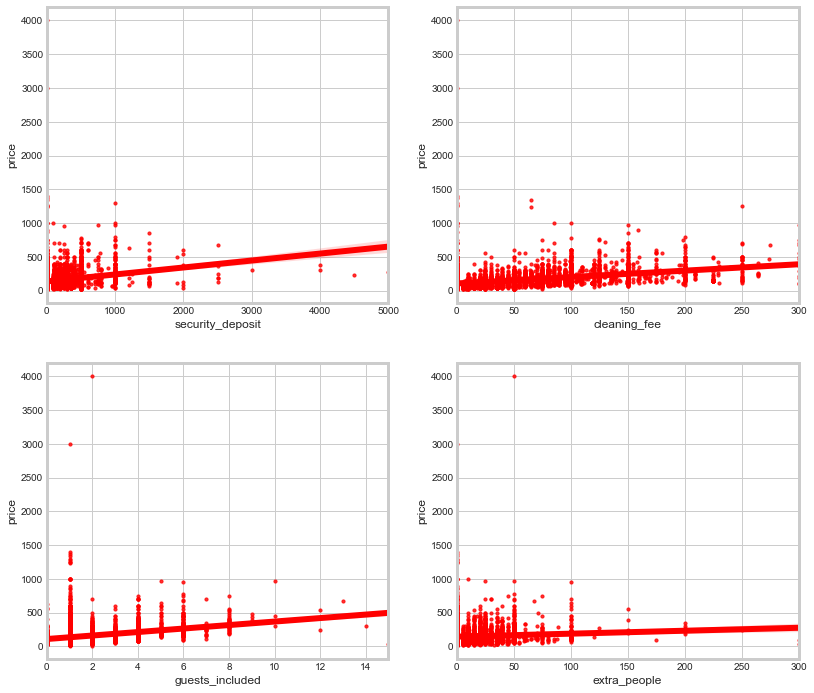

In [32]:
#Positive corr(red) , Negitive Corr(blue) 
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12)) #Intoduce a figure that includes 4 graphs

#plot the graph and set to axs
sns.regplot('security_deposit', 'price', data=df, fit_reg=True,color='red',scatter_kws={'s':10}, ax=ax[0,0]) 
sns.regplot('cleaning_fee', 'price', data=df, fit_reg=True,color='red',scatter_kws={'s':10}, ax=ax[0,1])
sns.regplot('guests_included', 'price', data=df, fit_reg=True,color='red',scatter_kws={'s':10}, ax=ax[1,0])
sns.regplot('extra_people', 'price', data=df, fit_reg=True,color='red',scatter_kws={'s':10}, ax=ax[1,1])
plt.show()

**Since I will not choose an NLP approch.I will extract the number of words each of these strings and replace the column which might serve as a feature worth exploring**

|Feature|Type|Action|
|---|---|---|
|**summary**|`object`|Get the word count insted|
|**space**|`object`|Get the word count insted|
|**description**|`object`|Get the word count insted|
|**neighborhood_overview**|`object`|Get the word count insted|
|**transit**|`object`|Get the word count insted|
|**host_about**|`object`|Get the word count insted|
|**notes**|`object`|Get the word count insted|


In [33]:
# This function will change the text into word count for better analysis
def get_wordcount(column,df=df):
    return df[str(column)].apply(lambda x : len(x.split(' ')) if type(x) == str else 0)

In [34]:
# calculate the wordcount of the columns above and apply it to new columns
df['summary_wc'] = get_wordcount('summary')
df['space_wc'] = get_wordcount('space')
df['description_wc'] = get_wordcount('description')
df['neighborhood_overview_wc'] = get_wordcount('neighborhood_overview')
df['transit_wc'] = get_wordcount('transit')
df['host_about_wc'] = get_wordcount('host_about')
df['notes_wc'] = get_wordcount('notes')

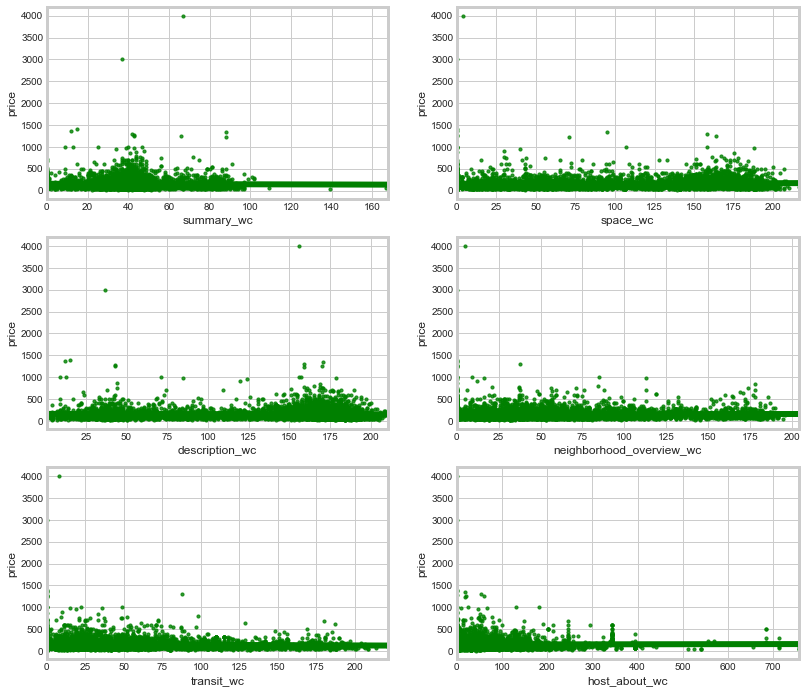

In [35]:
#Positive corr(red) , Negitive Corr(blue) 
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12)) #Intoduce a figure that includes 4 graphs

#plot the graph and set to axs
sns.regplot('summary_wc', 'price', data=df, fit_reg=True,color='green',scatter_kws={'s':10}, ax=ax[0,0]) 
sns.regplot('space_wc', 'price', data=df, fit_reg=True,color='green',scatter_kws={'s':10}, ax=ax[0,1])
sns.regplot('description_wc', 'price', data=df, fit_reg=True,color='green',scatter_kws={'s':10}, ax=ax[1,0])
sns.regplot('neighborhood_overview_wc', 'price', data=df, fit_reg=True,color='green',scatter_kws={'s':10}, ax=ax[1,1])
sns.regplot('transit_wc', 'price', data=df, fit_reg=True,color='green',scatter_kws={'s':10}, ax=ax[2,0])
sns.regplot('host_about_wc', 'price', data=df, fit_reg=True,color='green',scatter_kws={'s':10}, ax=ax[2,1])



plt.show()

Tukeys method number of outliers is 1239
90% confidence interval has 381 values between 40 and 41


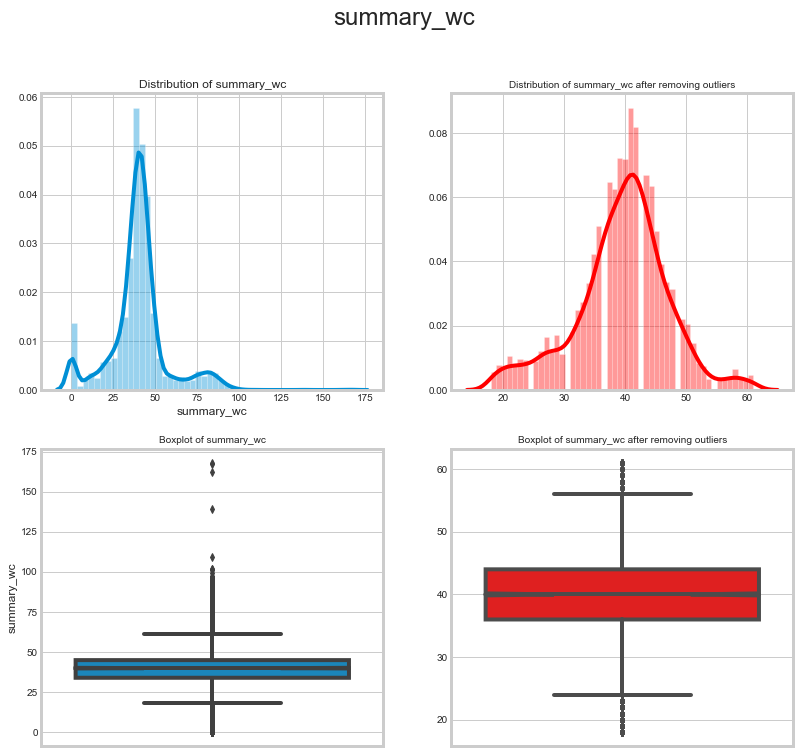

In [36]:
no_outlier('summary_wc',df)

Tukeys method number of outliers is 420
90% confidence interval has 44 values between 142 and 144


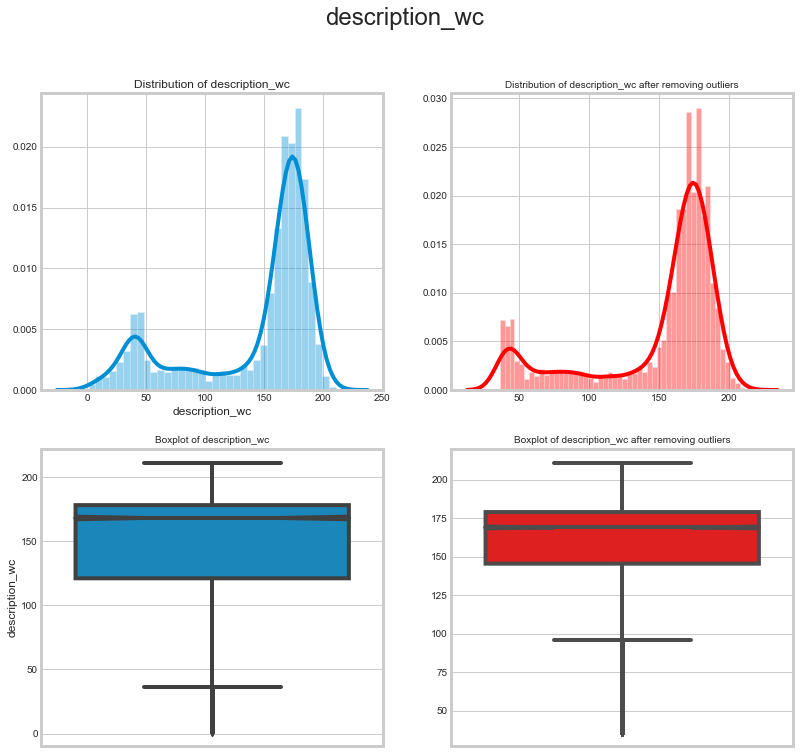

In [37]:
no_outlier('description_wc',df)

In [38]:
df['summary_wc'].mean()

40.19154396866136

In [39]:
# delete the columns 
del df['summary']
del df['space']
del df['description']
del df['neighborhood_overview']
del df['transit']
del df['host_about']
del df['notes']

|Feature|Type|Action|
|---|---|---|
|**experiences_offered**|`object`|delete since all values are none|


In [40]:
# check column 
df['experiences_offered'].head()

0    none
1    none
2    none
3    none
4    none
Name: experiences_offered, dtype: object

In [41]:
#check values
df['experiences_offered'].value_counts()

none    7403
Name: experiences_offered, dtype: int64

In [42]:
#delete column
del df['experiences_offered']

#### Location features:-

|Feature|Type|Action|
|---|---|---|
|**host_location**|`object`|clean|
|**smart_location**|`object`|clean|
|**city**|`object`|delete to avoid redundency|
|**zipcode**|`object`|clean|
|**state**|`object`|delete to avoid redundency|
|**country**|`object`|delete to avoid redundency|
|**street**|`object`|clean|
|**neighbourhood**|`object`|clean|
|**country_code**|`object`|delete to avoid redundency|
|**latitude**|`Float`|clean|
|**longitude**|`Float`|clean|
|**is_location_exact**|`object`|clean|


In [43]:
df[['host_location','smart_location','city','state','country','country_code','is_location_exact']]

,host_location,smart_location,city,state,country,country_code,is_location_exact
0,"Seattle, Washington, United States","Seattle, WA",Seattle,WA,United States,US,t
1,"Seattle, Washington, United States","Seattle, WA",Seattle,WA,United States,US,t
2,"Seattle, Washington, United States","Seattle, WA",Seattle,WA,United States,US,t
3,"Seattle, Washington, United States","Seattle, WA",Seattle,WA,United States,US,t
4,"Seattle, Washington, United States","Seattle, WA",Seattle,WA,United States,US,t
...,...,...,...,...,...,...,...
7398,"Somerville, Massachusetts, United States","Somerville, MA",Somerville,MA,United States,US,t
7399,US,"Brookline, MA",Brookline,MA,United States,US,f
7400,"New York, New York, United States","Cambridge, MA",Cambridge,MA,United States,US,f
7401,"Somerville, Massachusetts, United States","Somerville, MA",Somerville,MA,United States,US,t


**split the locations to get the city only which will reduce the value count and help with matching the host location to the property location**

In [45]:
#split the host_location to get only the city
df['host_location'] = df['host_location'].apply(lambda x : x.split(',')[0].split(' ')[0] if type(x) == str else 'unknown')
#split the property location to get only the city
df['smart_location'] = df['smart_location'].apply(lambda x : x.split(',')[0].split(' ')[0] if type(x) == str else 'unknown')

**check weather the host lives in the same city of the property or not**

In [46]:
#compare if the columns are equal put 1 else 0
df['host_match'] = np.where(df['host_location'] == df['smart_location'], 'local', 'remote')

In [47]:
df['host_match'].value_counts()

local     5598
remote    1805
Name: host_match, dtype: int64

In [ ]:
sns.catplot(x="host_match", y="price", kind="swarm", data=df);

In [ ]:
#to change back to int:bool compare if the columns are equal put 1 else 0
df['host_match'] = np.where(df['host_location'] == df['smart_location'], 1, 0)

In [38]:
# change the varibles to boolean of 0 and 1
df['is_location_exact'] = df['is_location_exact'].apply(lambda x : 1 if x == 't' else 0)
df['is_location_exact'].value_counts()

1    6492
0     911
Name: is_location_exact, dtype: int64

In [39]:
df[['zipcode','street','neighbourhood','latitude','longitude']].iloc[300:320]

,zipcode,street,neighbourhood,latitude,longitude
300,98105,"5th Avenue Northeast, Seattle, WA 98105, Unite...",Wallingford,47.665856,-122.322691
301,98103,"North 40th Street, Seattle, WA 98103, United S...",Wallingford,47.656355,-122.338104
302,98103,"North 43rd Street, Seattle, WA 98103, United S...",Wallingford,47.660147,-122.341530
303,98103,"Woodlawn Avenue North, Seattle, WA 98103, Unit...",Wallingford,47.666920,-122.338794
304,98103,"Interlake Avenue North, Seattle, WA 98103, Uni...",Wallingford,47.651586,-122.339903
305,98103,"N 40th St, Seattle, WA 98103, United States",Wallingford,47.655955,-122.332155
306,98103,"N 44th Street, Seattle, WA 98103, United States",NaN,47.659912,-122.337686
307,98103,"North 44th Street, Seattle, WA 98103, United S...",Wallingford,47.661032,-122.335164
308,98103,"East Green Lake Way N, Seattle, WA 98103, Unit...",NaN,47.668363,-122.338887
309,98103,"N 50th St, Seattle, WA 98103, United States",Wallingford,47.663695,-122.336225


In [40]:
#fix the zip_code
#split the zipcode by dash
df['zipcode'] = df['zipcode'].apply(lambda x : x.split('-')[0] if type(x) == str else 'missing')
#split the zipcode by space
df['zipcode'] = df['zipcode'].apply(lambda x : x.split(' ')[0] if type(x) == str else 'missing')
df['zipcode'].value_counts().head(10)

98122    420
98103    394
02116    388
98102    339
02130    331
02118    247
02215    236
02134    233
02114    231
98105    225
Name: zipcode, dtype: int64

In [41]:
#Fill the missing values in neighbourhood column using the mode of the zipcode
grouped_loc = df[['zipcode','neighbourhood']].groupby('zipcode')
zipcode_hood = []
#loop over the grouped items
for key, item in grouped_loc:
    zipcode_hood.append(grouped_loc.get_group(key))# append result to list 

zipcode_list = []
neighbourhood_list = []

for i in range(0,70): #loop over the list using the index
    zipcode_list.append(zipcode_hood[i].mode()['zipcode'][0])
    neighbourhood_list.append(zipcode_hood[i].mode()['neighbourhood'][0])

#create a dataframe to include the zipcode and the the mode of each zipcode mode
df_ziphood = pd.DataFrame({'zipcode':zipcode_list,'neighbourhood':neighbourhood_list})
df_ziphood.head(15)

,zipcode,neighbourhood
0,02108,Beacon Hill
1,02109,North End
2,02110,Downtown Crossing
3,02111,Chinatown
4,02113,North End
5,02114,Beacon Hill
6,02115,Back Bay
7,02116,Back Bay
8,02118,South End
9,02119,Roxbury


**fill the missing values in neighbourhood from the dataframe above**

In [42]:
#delete unnassary columns
del df['city']
del df['state']
del df['country']
del df['country_code']

In [43]:
df.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'zipcode', 'market', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped

|Feature|Type|Action|
|---|---|---|
|**neighbourhood**|`object`|clean|
|**neighbourhood_group_cleansed**|`object`|delete to avoid redundency|
|**neighbourhood_cleansed**|`object`|delete to avoid redundency|

In [44]:
#fill the neighbourhood missing values from neighbourhood_cleansed
df[['neighbourhood','neighbourhood_group_cleansed','neighbourhood_cleansed']]
df['neighbourhood'].fillna(df['neighbourhood_cleansed'],inplace=True)

In [45]:
#delete unnassary columns
del df['neighbourhood_group_cleansed']
del df['neighbourhood_cleansed']

|Feature|Type|Action|
|---|---|---|
|**host_name**|`object`|replace null with none|
|**host_since**|`date_time`|replace null with median|
|**host_response_time**|`object`|replace null with none|
|**host_response_rate**|`object`|replace from median|
|**host_acceptance_rate**|`object`|replace from median|
|**host_is_superhost**|`object`|clean|
|**host_neighbourhood**|`object`|delete to avoid redundency|

In [46]:
df['host_id'].isnull().sum()

0

In [47]:
df[['host_id','host_name','host_since','host_response_time','host_response_rate','host_acceptance_rate']].isnull().sum().sum()

3236

In [48]:
#group the host info to fill null values
grouped_host = df[['host_id','host_name','host_since','host_response_time','host_response_rate','host_acceptance_rate']].groupby('host_id')
host_info = []
for key, item in grouped_host:
    host_info.append(grouped_host.get_group(key))
    
#check the null values and validate using hosts other posts 
for i in host_info:
    print(i)

      host_id host_name  host_since  host_response_time host_response_rate  \
2184     4193   Jessica  2008-11-10  within a few hours                88%   
2190     4193   Jessica  2008-11-10  within a few hours                88%   
2192     4193   Jessica  2008-11-10  within a few hours                88%   
2194     4193   Jessica  2008-11-10  within a few hours                88%   

     host_acceptance_rate  
2184                 100%  
2190                 100%  
2192                 100%  
2194                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
7125     4240  Giuseppe  2008-11-11  within a few hours                90%   
7341     4240  Giuseppe  2008-11-11  within a few hours                90%   

     host_acceptance_rate  
7125                  78%  
7341                  78%  
      host_id host_name  host_since host_response_time host_response_rate  \
5362     4804     Frank  2008-12-03       within a day                94%

3984               100%                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
1292   119809     Weisi  2010-05-07  a few days or more                40%   

     host_acceptance_rate  
1292                 100%  
      host_id       host_name  host_since host_response_time  \
4133   120731  Adrian Nichola  2010-05-08     within an hour   

     host_response_rate host_acceptance_rate  
4133               100%                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5520   122982    Nadine  2010-05-11                NaN                NaN   

     host_acceptance_rate  
5520                  NaN  
      host_id  host_name  host_since host_response_time host_response_rate  \
5518   128280  Elizabeth  2010-05-19     within an hour               100%   
5538   128280  Elizabeth  2010-05-19     within an hour               100%   
5591   128280  Elizabeth  2010-05-19     within an hour               10

4969                   0%  
      host_id host_name  host_since  host_response_time host_response_rate  \
6710   271947      Bill  2010-10-26  within a few hours               100%   

     host_acceptance_rate  
6710                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
871   273088     Gerry  2010-10-28     within an hour               100%   
946   273088     Gerry  2010-10-28     within an hour               100%   

    host_acceptance_rate  
871                 100%  
946                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
7222   274270      Tony  2010-10-29     within an hour               100%   

     host_acceptance_rate  
7222                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
7261   274767    Bechir  2010-10-30                NaN                NaN   

     host_acceptance_rate  
7261                  NaN  
     host_id        host_na

5972                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
612   486018   William  2011-04-05                NaN                NaN   

    host_acceptance_rate  
612                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
6707   494453      Dave  2011-04-08       within a day                90%   

     host_acceptance_rate  
6707                  78%  
      host_id host_name  host_since host_response_time host_response_rate  \
6864   499127     Sarah  2011-04-10     within an hour               100%   

     host_acceptance_rate  
6864                  50%  
      host_id host_name  host_since host_response_time host_response_rate  \
4360   501255      Jeff  2011-04-11       within a day               100%   

     host_acceptance_rate  
4360                  30%  
      host_id host_name  host_since host_response_time host_response_rate  \
5535   501427       Joe  2011-04-11     within an hour 

3636                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1523   755725     Sunil  2011-06-28                NaN                NaN   

     host_acceptance_rate  
1523                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
3063   756099     Carie  2011-06-28     within an hour               100%   

     host_acceptance_rate  
3063                 100%  
      host_id  host_name  host_since  host_response_time host_response_rate  \
5864   757253  Nathaniel  2011-06-29  within a few hours               100%   
7122   757253  Nathaniel  2011-06-29  within a few hours               100%   

     host_acceptance_rate  
5864                  95%  
7122                  95%  
      host_id host_name  host_since  host_response_time host_response_rate  \
3291   759949    Marcia  2011-06-29  within a few hours               100%   

     host_acceptance_rate  
3291                 100%  
     host_id ho

4134                  56%  
      host_id host_name  host_since  host_response_time host_response_rate  \
2536   990195     Kerry  2011-08-18  within a few hours               100%   

     host_acceptance_rate  
2536                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
3040   990692      Paul  2011-08-18  within a few hours               100%   

     host_acceptance_rate  
3040                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1246  1002255      John  2011-08-21       within a day               100%   

     host_acceptance_rate  
1246                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
2235  1007123     Ellen  2011-08-22       within a day               100%   

     host_acceptance_rate  
2235                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
4855  1015632     Kevin  2011-08-24     within 

3321                 100%  
     host_id host_name  host_since  host_response_time host_response_rate  \
664  1276476   Roberto  2011-10-11  within a few hours               100%   

    host_acceptance_rate  
664                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1134  1282652    Amanda  2011-10-12       within a day                50%   

     host_acceptance_rate  
1134                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1713  1288618     Chris  2011-10-13                NaN                NaN   

     host_acceptance_rate  
1713                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
4575  1299837       Tom  2011-10-16     within an hour               100%   

     host_acceptance_rate  
4575                 100%  
     host_id host_name  host_since  host_response_time host_response_rate  \
262  1300775   Tatyana  2011-10-17  within a few hour

915                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
4307  1551509     Brett  2011-12-30     within an hour               100%   
4319  1551509     Brett  2011-12-30     within an hour               100%   
4326  1551509     Brett  2011-12-30     within an hour               100%   

     host_acceptance_rate  
4307                 100%  
4319                 100%  
4326                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6159  1555309  Mathilde  2012-01-01       within a day               100%   

     host_acceptance_rate  
6159                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3650  1566314    Vienna  2012-01-04       within a day               100%   

     host_acceptance_rate  
3650                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6788  1570388      Kayt  2012-01-05                Na

3059                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
1694  1872473     Trong  2012-03-06  within a few hours               100%   

     host_acceptance_rate  
1694                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3212  1881431     Frank  2012-03-08       within a day                80%   

     host_acceptance_rate  
3212                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
1174  1886540   Daniela  2012-03-08  within a few hours               100%   

     host_acceptance_rate  
1174                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
1866  1886546     Maria  2012-03-08       within a day               100%   

     host_acceptance_rate  
1866                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1992  1890330  Kristjan  2012-03-09       withi

2392                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
4823  2212661    Lauren  2012-04-24     within an hour               100%   

     host_acceptance_rate  
4823                   0%  
      host_id host_name  host_since host_response_time host_response_rate  \
5015  2221632       Tad  2012-04-25                NaN                NaN   

     host_acceptance_rate  
5015                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
3241  2222321       Deb  2012-04-25     within an hour               100%   
3247  2222321       Deb  2012-04-25     within an hour               100%   
3248  2222321       Deb  2012-04-25     within an hour               100%   

     host_acceptance_rate  
3241                 100%  
3247                 100%  
3248                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6663  2225350      Leah  2012-04-25                N

2356                 100%  
      host_id       host_name  host_since host_response_time  \
2148  2536735  Akiko And Matt  2012-06-03     within an hour   
2149  2536735  Akiko And Matt  2012-06-03     within an hour   

     host_response_rate host_acceptance_rate  
2148               100%                 100%  
2149               100%                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
2186  2537803   Heather  2012-06-03                NaN                NaN   

     host_acceptance_rate  
2186                  NaN  
     host_id host_name  host_since host_response_time host_response_rate  \
899  2544050       Jay  2012-06-04                NaN                NaN   

    host_acceptance_rate  
899                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
5849  2555135    Louise  2012-06-05                NaN                NaN   

     host_acceptance_rate  
5849                  NaN  
      hos

4944                   0%  
    host_id host_name  host_since  host_response_time host_response_rate  \
15  2983711     Paige  2012-07-18  within a few hours               100%   

   host_acceptance_rate  
15                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5062  2992060       Wes  2012-07-19       within a day                80%   

     host_acceptance_rate  
5062                  33%  
      host_id host_name  host_since host_response_time host_response_rate  \
2850  3001712      Amit  2012-07-20       within a day               100%   

     host_acceptance_rate  
2850                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
1183  3009864      Jess  2012-07-21  within a few hours               100%   

     host_acceptance_rate  
1183                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
1217  3010798    Calvin  2012-07-21  within a few hour

3989                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3423  3382100    Judith  2012-08-26  within a few hours               100%   

     host_acceptance_rate  
3423                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
4533  3387042    Nirmal  2012-08-27  within a few hours                93%   

     host_acceptance_rate  
4533                  50%  
      host_id     host_name  host_since host_response_time host_response_rate  \
3100  3393825  Darlene Tiki  2012-08-27                NaN                NaN   
3103  3393825  Darlene Tiki  2012-08-27                NaN                NaN   

     host_acceptance_rate  
3100                  NaN  
3103                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
1973  3396093     Elisa  2012-08-28  within a few hours                90%   
1997  3396093     Elisa  2012-08-28  within a few hours       

85                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
225   3787979     Cathy  2012-10-07     within an hour               100%   
2504  3787979     Cathy  2012-10-07     within an hour               100%   

     host_acceptance_rate  
225                  100%  
2504                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
28    3792761  Kimberly  2012-10-07     within an hour               100%   
224   3792761  Kimberly  2012-10-07     within an hour               100%   
1084  3792761  Kimberly  2012-10-07     within an hour               100%   
1417  3792761  Kimberly  2012-10-07     within an hour               100%   

     host_acceptance_rate  
28                   100%  
224                  100%  
1084                 100%  
1417                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3981  3817361   Alishya  2012-10-09       within a day 

529                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
527  4186082     Trung  2012-11-18                NaN                NaN   

    host_acceptance_rate  
527                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3935  4191762      Jeff  2012-11-19  within a few hours               100%   

     host_acceptance_rate  
3935                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3668  4193438      Alex  2012-11-19                NaN                NaN   

     host_acceptance_rate  
3668                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
3081  4194079      Lisa  2012-11-19     within an hour               100%   

     host_acceptance_rate  
3081                 100%  
      host_id                     host_name  host_since host_response_time  \
5061  4195134  LifestyleFurnishedApartments  2012-11-

6737                  91%  
      host_id host_name  host_since  host_response_time host_response_rate  \
5579  4724006   Rosalia  2013-01-16  within a few hours               100%   

     host_acceptance_rate  
5579                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
1170  4726215        Al  2013-01-16  within a few hours               100%   

     host_acceptance_rate  
1170                 100%  
      host_id      host_name  host_since  host_response_time  \
2612  4729705  Rob And Carol  2013-01-16  within a few hours   

     host_response_rate host_acceptance_rate  
2612               100%                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6562  4729990    Nicole  2013-01-16     within an hour               100%   
6563  4729990    Nicole  2013-01-16     within an hour               100%   

     host_acceptance_rate  
6562                 100%  
6563                 100%  
      h

2340                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
2523  5275075    Andrew  2013-03-01       within a day                75%   

     host_acceptance_rate  
2523                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
5423  5275817      Leah  2013-03-01  within a few hours               100%   

     host_acceptance_rate  
5423                 100%  
     host_id  host_name  host_since  host_response_time host_response_rate  \
686  5282519  Elizabeth  2013-03-01  within a few hours               100%   

    host_acceptance_rate  
686                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5360  5291968      Ryan  2013-03-02     within an hour                92%   
5407  5291968      Ryan  2013-03-02     within an hour                92%   
5490  5291968      Ryan  2013-03-02     within an hour                92%   
5497  5291968      Ryan  2013

3905                  74%  
      host_id  host_name  host_since host_response_time host_response_rate  \
4509  5695034  Elizabeth  2013-03-30       within a day               100%   
4574  5695034  Elizabeth  2013-03-30       within a day               100%   

     host_acceptance_rate  
4509                  85%  
4574                  85%  
     host_id host_name  host_since host_response_time host_response_rate  \
495  5707983  Kimberly  2013-03-31                NaN                NaN   

    host_acceptance_rate  
495                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
5446  5715872      Joan  2013-04-01     within an hour               100%   

     host_acceptance_rate  
5446                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
4539  5717433   Camille  2013-04-01     within an hour               100%   

     host_acceptance_rate  
4539                 100%  
     host_id host_name  

18                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
1020  6179918      Syed  2013-05-01                NaN                NaN   

     host_acceptance_rate  
1020                  NaN  
    host_id host_name  host_since host_response_time host_response_rate  \
29  6184895      Lana  2013-05-01     within an hour                71%   

   host_acceptance_rate  
29                 100%  
      host_id  host_name  host_since  host_response_time host_response_rate  \
6939  6201198  Elizabeth  2013-05-02  within a few hours               100%   
7076  6201198  Elizabeth  2013-05-02  within a few hours               100%   

     host_acceptance_rate  
6939                 100%  
7076                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
6469  6209951   Jeffrey  2013-05-03  within a few hours               100%   

     host_acceptance_rate  
6469                  75%  
      host_id host_name  

2047                  NaN  
     host_id host_name  host_since  host_response_time host_response_rate  \
948  6667088   Camille  2013-05-31  within a few hours               100%   

    host_acceptance_rate  
948                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
4027  6668129   Charles  2013-05-31                NaN                NaN   

     host_acceptance_rate  
4027                  NaN  
     host_id host_name  host_since  host_response_time host_response_rate  \
338  6668610       Don  2013-05-31  within a few hours               100%   

    host_acceptance_rate  
338                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1337  6671256       Sam  2013-05-31     within an hour               100%   

     host_acceptance_rate  
1337                 100%  
      host_id      host_name  host_since host_response_time  \
2228  6674981  Jill & Jerome  2013-05-31       within a day   

     

2739                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6725  7341841     Carol  2013-07-07     within an hour               100%   

     host_acceptance_rate  
6725                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
2598  7352976      Jack  2013-07-08  within a few hours               100%   

     host_acceptance_rate  
2598                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
2642  7354306   Michael  2013-07-08     within an hour               100%   
2650  7354306   Michael  2013-07-08     within an hour               100%   
2680  7354306   Michael  2013-07-08     within an hour               100%   
2771  7354306   Michael  2013-07-08     within an hour               100%   
2890  7354306   Michael  2013-07-08     within an hour               100%   
3525  7354306   Michael  2013-07-08     within an hour               100%   
3526  735

2831                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5398  7956208      Aida  2013-08-05     within an hour               100%   

     host_acceptance_rate  
5398                  73%  
      host_id host_name  host_since host_response_time host_response_rate  \
1106  7963866       Rob  2013-08-05     within an hour               100%   

     host_acceptance_rate  
1106                 100%  
      host_id  host_name  host_since host_response_time host_response_rate  \
4792  7964081  Gabriella  2013-08-05     within an hour               100%   

     host_acceptance_rate  
4792                  86%  
      host_id        host_name  host_since  host_response_time  \
3718  7964921  Charlie & Sarah  2013-08-05  within a few hours   
3808  7964921  Charlie & Sarah  2013-08-05  within a few hours   

     host_response_rate host_acceptance_rate  
3718               100%                 100%  
3808               100%                 100%

2272                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3872  8582699     Poppy  2013-09-02  within a few hours               100%   

     host_acceptance_rate  
3872                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
845  8594245      Kate  2013-09-02     within an hour               100%   

    host_acceptance_rate  
845                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3371  8604548     Samim  2013-09-03       within a day               100%   

     host_acceptance_rate  
3371                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1854  8607308      Lisa  2013-09-03     within an hour               100%   

     host_acceptance_rate  
1854                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
3073  8608392     Sasha  2013-09-03  within a few ho

2493                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
4007  9228417     Alice  2013-10-04  within a few hours               100%   

     host_acceptance_rate  
4007                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
466  9232171      Anna  2013-10-04     within an hour               100%   
469  9232171      Anna  2013-10-04     within an hour               100%   

    host_acceptance_rate  
466                 100%  
469                 100%  
      host_id  host_name  host_since host_response_time host_response_rate  \
2369  9233051  Sebastian  2013-10-04                NaN                NaN   

     host_acceptance_rate  
2369                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
5811  9240628   Patrick  2013-10-05       within a day                67%   

     host_acceptance_rate  
5811                 100%  
      host_id host_name  

647                 100%  
      host_id       host_name  host_since  host_response_time  \
1839  9783390  Angelika & Jim  2013-11-03  within a few hours   

     host_response_rate host_acceptance_rate  
1839               100%                 100%  
      host_id   host_name  host_since host_response_time host_response_rate  \
3578  9791687  Dan & Kris  2013-11-03       within a day               100%   

     host_acceptance_rate  
3578                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
3533  9792669    Hannah  2013-11-03       within a day                90%   

     host_acceptance_rate  
3533                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6453  9795590   Patrick  2013-11-03                NaN                NaN   

     host_acceptance_rate  
6453                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
2295  9813203  Margaret  2013-11-0

5256                  97%  
       host_id host_name  host_since  host_response_time host_response_rate  \
5750  10502779     Peter  2013-12-08  within a few hours               100%   
5784  10502779     Peter  2013-12-08  within a few hours               100%   

     host_acceptance_rate  
5750                 100%  
5784                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4132  10524003     Isaac  2013-12-09  within a few hours               100%   

     host_acceptance_rate  
4132                  50%  
       host_id host_name  host_since host_response_time host_response_rate  \
6025  10529861     Katia  2013-12-09                NaN                NaN   

     host_acceptance_rate  
6025                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
3169  10534771      Lisa  2013-12-09     within an hour               100%   

     host_acceptance_rate  
3169                 100%  
       ho

1980                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
5793  11308029       Liz  2014-01-14  within a few hours               100%   

     host_acceptance_rate  
5793                  75%  
       host_id host_name  host_since host_response_time host_response_rate  \
7400  11311919      Vera  2014-01-14       within a day                78%   

     host_acceptance_rate  
7400                  50%  
       host_id host_name  host_since host_response_time host_response_rate  \
4295  11331527      Nina  2014-01-15     within an hour               100%   

     host_acceptance_rate  
4295                  92%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4180  11332246     Oscar  2014-01-15  a few days or more                40%   

     host_acceptance_rate  
4180                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6679  11341278     Sarah  2014-01-15  

4165                  82%  
       host_id     host_name  host_since host_response_time  \
3670  12156808  Mandy & Andy  2015-06-09                NaN   

     host_response_rate host_acceptance_rate  
3670                NaN                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4045  12164071   Cynthia  2014-02-11     within an hour               100%   
4064  12164071   Cynthia  2014-02-11     within an hour               100%   
4103  12164071   Cynthia  2014-02-11     within an hour               100%   

     host_acceptance_rate  
4045                 100%  
4064                 100%  
4103                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6445  12165186     Masha  2014-02-11  within a few hours                95%   

     host_acceptance_rate  
6445                  67%  
       host_id host_name  host_since host_response_time host_response_rate  \
2845  12166491    Sydney  2014-02

2738                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
825  12935059   Suzanne  2014-03-08       within a day               100%   

    host_acceptance_rate  
825                 100%  
       host_id   host_name  host_since host_response_time host_response_rate  \
3913  12937716  Jean-Ellen  2014-03-08     within an hour                90%   

     host_acceptance_rate  
3913                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1890  12940195    Amanda  2014-03-09                NaN                NaN   

     host_acceptance_rate  
1890                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2605  12951431   Michael  2014-03-09     within an hour               100%   

     host_acceptance_rate  
2605                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6578  12952234      Jack  2014-03-09      

6065                  98%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4322  13935980   Prakhar  2014-04-05  within a few hours               100%   

     host_acceptance_rate  
4322                 100%  
       host_id      host_name  host_since host_response_time  \
3725  13959773  Rose Michelle  2014-04-06     within an hour   

     host_response_rate host_acceptance_rate  
3725               100%                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
643  13960065      Alan  2014-04-06                NaN                NaN   
820  13960065      Alan  2014-04-06                NaN                NaN   

    host_acceptance_rate  
643                  NaN  
820                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2064  13976883   Pauline  2014-04-06     within an hour               100%   

     host_acceptance_rate  
2064                 100%  
       h

6918                  NaN  
       host_id  host_name  host_since  host_response_time host_response_rate  \
1364  14859182  Alexandra  2014-04-28  within a few hours               100%   

     host_acceptance_rate  
1364                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
3165  14860162      Jenn  2014-04-28  within a few hours                90%   
3231  14860162      Jenn  2014-04-28  within a few hours                90%   

     host_acceptance_rate  
3165                 100%  
3231                 100%  
       host_id          host_name  host_since  host_response_time  \
6050  14889768  Danielle And Cory  2014-04-29  within a few hours   

     host_response_rate host_acceptance_rate  
6050               100%                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4529  14890925   Natalia  2014-04-29     within an hour               100%   

     host_acceptance_rate  
4529           

5450               100%                 100%  
      host_id           host_name  host_since host_response_time  \
319  15606907  Karen, Chip & Karl  2014-05-16                NaN   

    host_response_rate host_acceptance_rate  
319                NaN                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
3211  15611795   Santosh  2014-05-16       within a day                80%   

     host_acceptance_rate  
3211                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4092  15637560      Adam  2014-05-17  within a few hours               100%   

     host_acceptance_rate  
4092                  86%  
      host_id host_name  host_since host_response_time host_response_rate  \
122  15655683   Michael  2014-05-18       within a day               100%   

    host_acceptance_rate  
122                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
5671  15

5188                  88%  
     host_id host_name  host_since  host_response_time host_response_rate  \
2   16708587      Jill  2014-06-12  within a few hours                67%   
25  16708587      Jill  2014-06-12  within a few hours                67%   

   host_acceptance_rate  
2                  100%  
25                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
669  16718874   Patrice  2014-06-12       within a day                67%   

    host_acceptance_rate  
669                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3793  16727906      Tory  2014-06-13     within an hour               100%   

     host_acceptance_rate  
3793                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
951  16729336   Deborah  2014-06-13     within an hour               100%   

    host_acceptance_rate  
951                 100%  
       host_id host_name  host_

43                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2600  17613151       Lea  2014-07-03     within an hour               100%   

     host_acceptance_rate  
2600                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3435  17640965    Gloria  2014-07-04     within an hour               100%   

     host_acceptance_rate  
3435                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3627  17644043     Angel  2014-07-04       within a day               100%   

     host_acceptance_rate  
3627                 100%  
      host_id       host_name  host_since host_response_time  \
285  17717833  Brian And Gina  2014-07-06     within an hour   

    host_response_rate host_acceptance_rate  
285               100%                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6491  17735272     David  2014-07-06

6772                  56%  
       host_id host_name  host_since host_response_time host_response_rate  \
6052  18494756  Angelica  2014-07-20                NaN                NaN   

     host_acceptance_rate  
6052                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
4645  18517776     Huggy  2014-07-21       within a day                93%   
4678  18517776     Huggy  2014-07-21       within a day                93%   
4710  18517776     Huggy  2014-07-21       within a day                93%   
4720  18517776     Huggy  2014-07-21       within a day                93%   
6792  18517776     Huggy  2014-07-21       within a day                93%   
6844  18517776     Huggy  2014-07-21       within a day                93%   

     host_acceptance_rate  
4645                  57%  
4678                  57%  
4710                  57%  
4720                  57%  
6792                  57%  
6844                  57%  
       host_id h

376                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
1669  19415602    Dustin  2014-08-03       within a day               100%   

     host_acceptance_rate  
1669                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5288  19435065    Felana  2014-08-04     within an hour               100%   

     host_acceptance_rate  
5288                  83%  
       host_id host_name  host_since host_response_time host_response_rate  \
5577  19455327   Brendon  2014-08-04     within an hour               100%   

     host_acceptance_rate  
5577                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6558  19466495   Barbara  2014-08-04  within a few hours                90%   

     host_acceptance_rate  
6558                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1131  19469036       Joe  2014-08-04     

4457                  86%  
       host_id host_name  host_since host_response_time host_response_rate  \
1999  20266233      Kate  2014-08-19     within an hour               100%   

     host_acceptance_rate  
1999                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1976  20283872      Lisa  2014-08-19     within an hour                92%   
2009  20283872      Lisa  2014-08-19     within an hour                92%   

     host_acceptance_rate  
1976                 100%  
2009                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
818  20314969     Ariel  2014-08-20     within an hour               100%   

    host_acceptance_rate  
818                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1969  20321164      Noel  2014-08-20     within an hour               100%   
1988  20321164      Noel  2014-08-20     within an hour               100% 

3294                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1530  21153266    Angela  2014-09-10  within a few hours                90%   

     host_acceptance_rate  
1530                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1416  21176908     Hadar  2014-09-10     within an hour               100%   

     host_acceptance_rate  
1416                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3070  21178519      Jeff  2014-09-10                NaN                NaN   

     host_acceptance_rate  
3070                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
4469  21184200     Paige  2014-09-10     within an hour                99%   
4513  21184200     Paige  2014-09-10     within an hour                99%   
4520  21184200     Paige  2014-09-10     within an hour                99%   
4993  21184200     

431                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
366  22102774     Julia  2014-10-03                NaN                NaN   

    host_acceptance_rate  
366                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
4759  22110106     Chris  2014-10-04     within an hour               100%   
4999  22110106     Chris  2014-10-04     within an hour               100%   

     host_acceptance_rate  
4759                  96%  
4999                  96%  
       host_id host_name  host_since host_response_time host_response_rate  \
1218  22134250       Amy  2014-10-04     within an hour                92%   
1232  22134250       Amy  2014-10-04     within an hour                92%   
1412  22134250       Amy  2014-10-04     within an hour                92%   

     host_acceptance_rate  
1218                 100%  
1232                 100%  
1412                 100%  
       host_id host_

1344                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
851  23270234     Alexa  2014-11-02       within a day                70%   

    host_acceptance_rate  
851                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1356  23312083     Aaron  2014-11-03     within an hour                76%   
1590  23312083     Aaron  2014-11-03     within an hour                76%   
1640  23312083     Aaron  2014-11-03     within an hour                76%   

     host_acceptance_rate  
1356                 100%  
1590                 100%  
1640                 100%  
       host_id        host_name  host_since host_response_time  \
2183  23315402  Theresa And Joe  2014-11-03     within an hour   

     host_response_rate host_acceptance_rate  
2183               100%                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1628  23316438    Justin  2014-1

4836                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
5280  24196977     Jenny  2014-11-26  within a few hours               100%   

     host_acceptance_rate  
5280                   0%  
       host_id host_name  host_since host_response_time host_response_rate  \
3277  24212314   Kirsten  2014-11-27       within a day                70%   
3282  24212314   Kirsten  2014-11-27       within a day                70%   

     host_acceptance_rate  
3277                 100%  
3282                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1539  24243156  Nicholas  2014-11-27     within an hour               100%   

     host_acceptance_rate  
1539                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6284  24257739     Emery  2014-11-28  a few days or more                19%   

     host_acceptance_rate  
6284                 100%  
       hos

6901                  92%  
       host_id host_name  host_since  host_response_time host_response_rate  \
5368  25205247    Monica  2014-12-26  within a few hours               100%   

     host_acceptance_rate  
5368                  64%  
       host_id host_name  host_since host_response_time host_response_rate  \
1804  25239442     Roger  2014-12-26     within an hour               100%   

     host_acceptance_rate  
1804                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2074  25243138       Mat  2014-12-26                NaN                NaN   

     host_acceptance_rate  
2074                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
3004  25274592     Kassy  2014-12-27     within an hour               100%   

     host_acceptance_rate  
3004                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
7152  25279966        Vj  2014-12-27    

2413                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
2769  26326126       Dan  2015-01-18  within a few hours               100%   

     host_acceptance_rate  
2769                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4867  26345165   Patrick  2015-01-19                NaN                NaN   

     host_acceptance_rate  
4867                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
7100  26347507  Meredith  2015-01-19                NaN                NaN   

     host_acceptance_rate  
7100                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2309  26378499  Marshall  2015-01-19       within a day               100%   

     host_acceptance_rate  
2309                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1787  26378802    Chelsi  2015-01-19    

283                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2424  27663401    Manlio  2015-02-12     within an hour               100%   

     host_acceptance_rate  
2424                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1569  27676513     Sarah  2015-02-13                NaN                NaN   

     host_acceptance_rate  
1569                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
6551  27696228     Jeena  2015-02-13  a few days or more                36%   
6554  27696228     Jeena  2015-02-13  a few days or more                36%   

     host_acceptance_rate  
6551                  71%  
6554                  71%  
      host_id host_name  host_since host_response_time host_response_rate  \
799  27711842     Alden  2015-02-13       within a day                70%   

    host_acceptance_rate  
799                 100%  
       host_id  

6029                  NaN  
       host_id   host_name  host_since host_response_time host_response_rate  \
3580  28883039  J. Ildrich  2015-03-06     within an hour               100%   

     host_acceptance_rate  
3580                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3380  28885639      Alex  2015-03-06       within a day               100%   

     host_acceptance_rate  
3380                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3535  28917785      Gary  2015-03-07  within a few hours                63%   

     host_acceptance_rate  
3535                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4847  28943553     Tessa  2015-03-07  within a few hours                90%   

     host_acceptance_rate  
4847                  82%  
       host_id host_name  host_since host_response_time host_response_rate  \
1817  28943976      Isai  2015-03-

3722                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
7231  30228015  Socrates  2015-03-29                NaN                NaN   

     host_acceptance_rate  
7231                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
5581  30238002    Robert  2015-03-29  a few days or more                 0%   

     host_acceptance_rate  
5581                 100%  
       host_id           host_name  host_since  host_response_time  \
6806  30240262  Matthew And Nathan  2015-03-29  within a few hours   

     host_response_rate host_acceptance_rate  
6806               100%                  62%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3719  30248897   Heather  2015-03-30  within a few hours               100%   

     host_acceptance_rate  
3719                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1219  30283594 

3995                  78%  
       host_id        host_name  host_since  host_response_time  \
1540  31730119  Maggie And Luly  2015-04-22  within a few hours   

     host_response_rate host_acceptance_rate  
1540                83%                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4291  31744945    Nathan  2015-04-22       within a day               100%   

     host_acceptance_rate  
4291                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1069  31751507       Rex  2015-04-22     within an hour               100%   
1073  31751507       Rex  2015-04-22     within an hour               100%   

     host_acceptance_rate  
1069                 100%  
1073                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3809  31752892     Megan  2015-04-22       within a day               100%   

     host_acceptance_rate  
3809                 100% 

3240                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6450  33037385      Brij  2015-05-10     within an hour               100%   

     host_acceptance_rate  
6450                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
318  33039203     Tobin  2015-05-10     within an hour               100%   

    host_acceptance_rate  
318                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
7054  33049221  Resident  2015-05-10                NaN                NaN   

     host_acceptance_rate  
7054                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
1674  33065911     Cindy  2015-05-10     within an hour               100%   

     host_acceptance_rate  
1674                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2375  33085192   Michael  2015-05-11          

1756                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
700  34472831     Clara  2015-05-28                NaN                NaN   

    host_acceptance_rate  
700                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
3444  34487300      E.J.  2015-05-29  within a few hours               100%   

     host_acceptance_rate  
3444                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
5210  34523300       Jie  2015-05-29  within a few hours               100%   

     host_acceptance_rate  
5210                 100%  
       host_id  host_name  host_since  host_response_time host_response_rate  \
4632  34532779  Christian  2015-05-29  within a few hours               100%   
6794  34532779  Christian  2015-05-29  within a few hours               100%   

     host_acceptance_rate  
4632                  99%  
6794                  99%  
       h

1353                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3969  35962316      Zack  2015-06-16  within a few hours               100%   

     host_acceptance_rate  
3969                  17%  
       host_id host_name  host_since host_response_time host_response_rate  \
6468  35975768     Riful  2015-06-16       within a day               100%   

     host_acceptance_rate  
6468                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3606  35976192     Nikki  2015-06-16                NaN                NaN   

     host_acceptance_rate  
3606                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6241  35990162    Gerald  2015-06-16     within an hour               100%   

     host_acceptance_rate  
6241                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4276  36004400   Saleena  2015-06-16  w

652                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1385  37283489    Debbie  2015-07-02     within an hour               100%   

     host_acceptance_rate  
1385                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5153  37320933       Ken  2015-07-02                NaN                NaN   

     host_acceptance_rate  
5153                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5417  37344176    Khuyến  2015-07-02       within a day                90%   
5489  37344176    Khuyến  2015-07-02       within a day                90%   

     host_acceptance_rate  
5417                  67%  
5489                  67%  
       host_id       host_name  host_since host_response_time  \
1815  37349992  John & Bridget  2015-07-02     within an hour   

     host_response_rate host_acceptance_rate  
1815               100%                 100%  
   

935                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
5314  38478454      Kate  2015-07-14  within a few hours                94%   

     host_acceptance_rate  
5314                  91%  
       host_id host_name  host_since host_response_time host_response_rate  \
1737  38502645       Ron  2015-07-14     within an hour               100%   

     host_acceptance_rate  
1737                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6930  38510998      Kara  2015-07-14       within a day               100%   

     host_acceptance_rate  
6930                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2445  38514732      Lars  2015-07-14     within an hour                91%   

     host_acceptance_rate  
2445                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1407  38562686      Jeff  2015-07-15     

7175                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
2014  40298873  Jonathan  2015-08-02  within a few hours               100%   

     host_acceptance_rate  
2014                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6021  40314351      Ryan  2015-08-02                NaN                NaN   

     host_acceptance_rate  
6021                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
713  40321471        Li  2015-08-02                NaN                NaN   

    host_acceptance_rate  
713                  NaN  
     host_id host_name  host_since host_response_time host_response_rate  \
35  40335071     Kevin  2015-08-02     within an hour               100%   
38  40335071     Kevin  2015-08-02     within an hour               100%   

   host_acceptance_rate  
35                 100%  
38                 100%  
       host_id host_name  ho

7335                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
525  41736327   Lizanne  2015-08-17     within an hour               100%   

    host_acceptance_rate  
525                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
5778  41766550      Mike  2015-08-17  within a few hours               100%   

     host_acceptance_rate  
5778                  83%  
       host_id host_name  host_since host_response_time host_response_rate  \
2273  41775435    Mehrit  2015-08-18     within an hour               100%   
2315  41775435    Mehrit  2015-08-18     within an hour               100%   
2316  41775435    Mehrit  2015-08-18     within an hour               100%   

     host_acceptance_rate  
2273                 100%  
2315                 100%  
2316                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1019  41823177      Phuc  2015-08-18       wi

535                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1629  43053036    Andrew  2015-09-01     within an hour               100%   

     host_acceptance_rate  
1629                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4633  43078666     Edith  2015-09-01     within an hour                90%   
4661  43078666     Edith  2015-09-01     within an hour                90%   
6815  43078666     Edith  2015-09-01     within an hour                90%   

     host_acceptance_rate  
4633                  80%  
4661                  80%  
6815                  80%  
       host_id host_name  host_since host_response_time host_response_rate  \
1769  43121592    Brooke  2015-09-01       within a day               100%   

     host_acceptance_rate  
1769                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
778  43124221   Khristy  2015-09-01          

7347                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6385  44544181       Eve  2015-09-19  within a few hours                90%   

     host_acceptance_rate  
6385                  67%  
       host_id host_name  host_since host_response_time host_response_rate  \
6555  44581223     Andre  2015-09-19     within an hour               100%   
6560  44581223     Andre  2015-09-19     within an hour               100%   

     host_acceptance_rate  
6555                  92%  
6560                  92%  
       host_id host_name  host_since host_response_time host_response_rate  \
5391  44617326  Caroline  2015-09-19     within an hour               100%   
5444  44617326  Caroline  2015-09-19     within an hour               100%   
5452  44617326  Caroline  2015-09-19     within an hour               100%   

     host_acceptance_rate  
5391                 100%  
5444                 100%  
5452                 100%  
       host_i

5979                  54%  
       host_id host_name  host_since  host_response_time host_response_rate  \
5300  45840601      Raul  2015-10-05  within a few hours               100%   

     host_acceptance_rate  
5300                  64%  
       host_id host_name  host_since host_response_time host_response_rate  \
6904  45851126     Kelly  2015-10-05       within a day               100%   

     host_acceptance_rate  
6904                  67%  
       host_id host_name  host_since host_response_time host_response_rate  \
2938  45859720      Brad  2015-10-05     within an hour               100%   

     host_acceptance_rate  
2938                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
7373  45902201    Wencai  2015-10-06  within a few hours               100%   

     host_acceptance_rate  
7373                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2833  45917623       Rah  2015-10-06  

7143                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4200  47482159     Julie  2015-10-26                NaN                NaN   

     host_acceptance_rate  
4200                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5882  47486176      Jack  2015-10-26     within an hour               100%   

     host_acceptance_rate  
5882                  98%  
       host_id host_name  host_since host_response_time host_response_rate  \
6201  47487818     Kayla  2015-10-26                NaN                NaN   

     host_acceptance_rate  
6201                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6076  47492498     Mohab  2015-10-26     within an hour               100%   
6089  47492498     Mohab  2015-10-26     within an hour               100%   

     host_acceptance_rate  
6076                 100%  
6089                 100%  
       host_id

4963               100%                  64%  
       host_id host_name  host_since host_response_time host_response_rate  \
6984  49121877      Nick  2015-11-15     within an hour               100%   

     host_acceptance_rate  
6984                  93%  
       host_id host_name  host_since  host_response_time host_response_rate  \
2381  49123244   Charlie  2015-11-15  within a few hours                90%   

     host_acceptance_rate  
2381                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1000  49182357   Colleen  2015-11-16  within a few hours               100%   

     host_acceptance_rate  
1000                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
7145  49194545     Grace  2015-11-16     within an hour               100%   

     host_acceptance_rate  
7145                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
2020  49196596    

4481                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3632  50763436      Josh  2015-12-07  within a few hours               100%   

     host_acceptance_rate  
3632                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5044  50766866    Robert  2015-12-07                NaN                NaN   

     host_acceptance_rate  
5044                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6845  50782486    Payton  2015-12-08     within an hour               100%   

     host_acceptance_rate  
6845                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3237  50862682   Maureen  2015-12-08                NaN                NaN   

     host_acceptance_rate  
3237                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
1476  50913131    Kendra  2015-12-09    

7258                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6330  54664198    Stuart  2016-01-14                NaN                NaN   

     host_acceptance_rate  
6330                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6933  54731245    Daniel  2016-01-15     within an hour                88%   

     host_acceptance_rate  
6933                 100%  
       host_id   host_name  host_since host_response_time host_response_rate  \
6703  54749443  Thanh&Curt  2016-01-15     within an hour               100%   
6782  54749443  Thanh&Curt  2016-01-15     within an hour               100%   

     host_acceptance_rate  
6703                 100%  
6782                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5783  54815922     Nancy  2016-01-16     within an hour                94%   

     host_acceptance_rate  
5783                  87%  
       h

4987                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6863  64969164   Patrick  2016-03-29     within an hour               100%   
6919  64969164   Patrick  2016-03-29     within an hour               100%   
7000  64969164   Patrick  2016-03-29     within an hour               100%   

     host_acceptance_rate  
6863                  97%  
6919                  97%  
7000                  97%  
       host_id host_name  host_since host_response_time host_response_rate  \
5152  65268598       Rob  2016-03-31     within an hour               100%   

     host_acceptance_rate  
5152                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6138  65474357       Eli  2016-04-02  within a few hours               100%   

     host_acceptance_rate  
6138                  91%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6303  65476280    Marvin  2016-04-02  a 

5341                  67%  
       host_id host_name  host_since host_response_time host_response_rate  \
5335  71670493   Patrick  2016-05-12     within an hour               100%   

     host_acceptance_rate  
5335                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6013  71965368       Tal  2016-05-14  a few days or more                 0%   

     host_acceptance_rate  
6013                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
7077  71981688   Lindsey  2016-05-14  within a few hours               100%   

     host_acceptance_rate  
7077                  46%  
       host_id host_name  host_since host_response_time host_response_rate  \
6433  72014205   Patille  2016-05-14       within a day                80%   

     host_acceptance_rate  
6433                  33%  
       host_id host_name  host_since host_response_time host_response_rate  \
3927  72132089    Hannah  2016-05-15  

4471                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6410  81160490     Faruk  2016-07-01     within an hour               100%   
6447  81160490     Faruk  2016-07-01     within an hour               100%   

     host_acceptance_rate  
6410                  86%  
6447                  86%  
       host_id         host_name  host_since host_response_time  \
5989  81301451  Azize And Vivian  2016-07-02     within an hour   

     host_response_rate host_acceptance_rate  
5989               100%                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5364  81414368     Olena  2016-07-03     within an hour               100%   

     host_acceptance_rate  
5364                 100%  
       host_id  host_name  host_since host_response_time host_response_rate  \
6532  81440709  Alexandra  2016-07-03     within an hour               100%   

     host_acceptance_rate  
6532                 100

7379                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
4839  92663980      Fadi  2016-08-30                NaN                NaN   

     host_acceptance_rate  
4839                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6619  92712021     Zulma  2016-08-30                NaN                NaN   

     host_acceptance_rate  
6619                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6952  92878185    Victor  2016-08-31                NaN                NaN   
6964  92878185    Victor  2016-08-31                NaN                NaN   

     host_acceptance_rate  
6952                  NaN  
6964                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5933  93031650       Kay  2016-09-01                NaN                NaN   

     host_acceptance_rate  
5933                  NaN  
       host_id

**Since null values are consitstent through out all hosts postings we have to do it manually**

In [49]:
df[['host_id','host_name','host_since','host_response_time','host_response_rate','host_acceptance_rate']]

,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate
0,956883,Maija,2011-08-11,within a few hours,96%,100%
1,5177328,Andrea,2013-02-21,within an hour,98%,100%
2,16708587,Jill,2014-06-12,within a few hours,67%,100%
3,9851441,Emily,2013-11-06,NaN,NaN,NaN
4,1452570,Emily,2011-11-29,within an hour,100%,NaN
...,...,...,...,...,...,...
7398,19246369,Joe,2014-07-31,within an hour,96%,100%
7399,37366454,Ivy,2015-07-02,a few days or more,10%,83%
7400,11311919,Vera,2014-01-14,within a day,78%,50%
7401,74318064,Medi,2016-05-27,within an hour,100%,96%


In [50]:
# fill the host name null values with none
df['host_name'].isnull().sum()
df['host_name'].fillna('none',inplace = True)

In [51]:
# change host_since to date_time format
df['host_since'].isnull().sum()
df['host_since']= pd.to_datetime(df['host_since'])
# fill missing values with the mode
df['host_since'].fillna(df['host_since'].mode()[0],inplace = True)

In [52]:
# fill host_response_time with unknown since we don't know response time
df['host_response_time'].fillna('unknown',inplace = True)

In [53]:
# strip the percentage sign before filling the missing values
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: int(x.strip('%')) if type(x) == str else None)
# fill the missing value with the median
df['host_response_rate'].fillna(df['host_response_rate'].median(),inplace = True)

In [54]:
# strip the percentage sign before filling the missing values
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(lambda x: int(x.strip('%')) if type(x) == str else None)
# fill the missing value with the median
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median(), inplace = True)

In [55]:
# change t , f values to boolean 0 , 1
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x : 1 if x == 't' else 0)
df['host_is_superhost'].isnull().sum()
df['host_is_superhost'].fillna(df['host_is_superhost'].mode(),inplace=True)

In [56]:
#delete unnacassary columns
del df['host_neighbourhood']

|Feature|Type|Action|
|---|---|---|
|**host_listings_count**|`float64`|replace null with mean|
|**host_total_listings_count**|`float64`|replace null with mean|
|**host_has_profile_pic**|`object`|replace null with none|
|**host_identity_verified**|`object`|replace from median|
|**host_verifications**|`object`|replace from verification count|
|**market**|`object`|delete to avoid redundency|


In [57]:
#get info
df['host_listings_count'].value_counts()
df['host_listings_count'].isnull().sum()
# replace the null values with the mean
df['host_listings_count'].fillna(df['host_listings_count'].mean(),inplace = True)
#round the values
df['host_listings_count'] = df['host_listings_count'].apply(lambda x : round(x))

In [58]:
df['host_total_listings_count'].head()
df['host_total_listings_count'].value_counts()
df['host_total_listings_count'].isnull().sum()
#replace the null values with the mean
df['host_total_listings_count'].fillna(df['host_total_listings_count'].mean(),inplace = True)
#round the values for easier computation
df['host_total_listings_count'] = df['host_total_listings_count'].apply(lambda x : round(x))

In [59]:
df['host_has_profile_pic'].head()
df['host_has_profile_pic'].isnull().sum()
# change t , f values to boolean 0 , 1 and missing values to 0 
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(lambda x : 1 if x == 't' else 0)

In [60]:
df['host_identity_verified'].head()
df['host_identity_verified'].isnull().sum()
# change t , f values to boolean 0 , 1 and missing values to 0 
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x : 1 if x == 't' else 0)

In [61]:
df['host_verifications'].head()
# get the count of host_verifications insted of list
df['host_verifications_count'] = df['host_verifications'].apply(lambda x : len(x))

In [62]:
df['host_verifications_count'].value_counts()

36    1208
38    1124
48    1106
29     953
50     685
      ... 
19       1
31       1
16       1
12       1
87       1
Name: host_verifications_count, Length: 64, dtype: int64

In [63]:
df['market'].head()
df['market'].value_counts()

Seattle                  3818
Boston                   3568
Other (International)       1
Other (Domestic)            1
San Francisco               1
Name: market, dtype: int64

In [64]:
del df['market']
del df['host_verifications']

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                7403 non-null   int64         
 1   scrape_id                         7403 non-null   int64         
 2   last_scraped                      7403 non-null   object        
 3   name                              7403 non-null   object        
 4   host_id                           7403 non-null   int64         
 5   host_name                         7403 non-null   object        
 6   host_since                        7403 non-null   datetime64[ns]
 7   host_location                     7403 non-null   object        
 8   host_response_time                7403 non-null   object        
 9   host_response_rate                7403 non-null   float64       
 10  host_acceptance_rate              7403 non-null 

|Feature|Type|Action|
|---|---|---|
|**property_type**|`float64`|replace null with mean|
|**room_type**|`float64`|replace null with mean|
|**accommodates**|`int64`|replace null with none|
|**bathrooms**|`float64`|replace from median|
|**bedrooms**|`float64`|replace missing with the mode|
|**beds**|`float64`|replace missing with the mode|
|**bed_type**|`object`|clean|
|**amenities**|`object`|get the count of amenities|

In [66]:
df[['property_type','room_type','accommodates','bathrooms','bedrooms']]

,property_type,room_type,accommodates,bathrooms,bedrooms
0,Apartment,Entire home/apt,4,1.0,1.0
1,Apartment,Entire home/apt,4,1.0,1.0
2,House,Entire home/apt,11,4.5,5.0
3,Apartment,Entire home/apt,3,1.0,0.0
4,House,Entire home/apt,6,2.0,3.0
...,...,...,...,...,...
7398,Apartment,Private room,3,1.0,1.0
7399,Apartment,Private room,2,1.0,1.0
7400,Apartment,Entire home/apt,4,1.0,1.0
7401,Apartment,Private room,2,1.0,1.0


In [67]:
#get info property_type
df['property_type'].value_counts()
df['property_type'].isnull().sum()
#fill the missing values with the mode
df['property_type'].fillna(df['property_type'].mode()[0],inplace=True)
df['property_type'].isnull().sum()

0

In [68]:
#get info room_type
df['room_type'].head()
df['room_type'].value_counts()
df['room_type'].isnull().sum()

0

In [69]:
# get info accommodates
df['accommodates'].head()
df['accommodates'].value_counts()
df['accommodates'].isnull().sum()

0

In [70]:
# get into bathrooms
df['bathrooms'].head()
df['bathrooms'].value_counts()
df['bathrooms'].isnull().sum()
#fill the missing values using the mode
df['bathrooms'].fillna(df['bathrooms'].mode()[0],inplace=True)
df['bathrooms'].isnull().sum()

0

In [71]:
#get info bedrooms
df['bedrooms'].head()
df['bedrooms'].value_counts()
df['bedrooms'].isnull().sum()
#fill the missing values using the mode
df['bedrooms'].fillna(df['bedrooms'].mode()[0],inplace=True)
df['bedrooms'].isnull().sum()

0

In [72]:
df['beds'].head()
df['beds'].value_counts()
df['beds'].isnull().sum()
df['beds'].fillna(df['beds'].mode()[0],inplace=True)
df['beds'].isnull().sum()

0

In [73]:
df['bed_type'].head()
df['bed_type'].value_counts()
df['bed_type'].isnull().sum()

0

In [74]:
df['amenities'].head()
df['amenities_count'] = df['amenities'].apply(lambda x : len(x.split(',')) if type(x) == str else 0)
df['amenities_count'].value_counts()
df['amenities_count'].isnull().sum()   

0

In [75]:
#delete unnassary columns
del df['amenities']

|Feature|Type|Action|
|---|---|---|
|**minimum_nights**|`int64`|clean|
|**maximum_nights**|`int64`|clean|
|**calendar_updated**|`object`|clean|
|**has_availability**|`object`|make bool|
|**availability_30**|`int64`|clean|
|**availability_60**|`int64`|clean|
|**availability_90**|`int64`|clean|
|**availability_365**|`int64`|clean|
|**calendar_last_scraped**|`object`|delete to avoid redundency|

In [83]:
df[['minimum_nights','maximum_nights','calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped']]

,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped
0,1,365,4 weeks ago,t,14,41,71,346,2016-01-04
1,2,90,today,t,13,13,16,291,2016-01-04
2,4,30,5 weeks ago,t,1,6,17,220,2016-01-04
3,1,1125,6 months ago,t,0,0,0,143,2016-01-04
4,1,1125,7 weeks ago,t,30,60,90,365,2016-01-04
...,...,...,...,...,...,...,...,...,...
7398,2,1125,5 days ago,NaN,21,51,81,356,2016-09-06
7399,3,365,never,NaN,29,59,89,364,2016-09-06
7400,3,12,3 weeks ago,NaN,0,15,40,40,2016-09-06
7401,1,13,today,NaN,5,5,5,253,2016-09-06


In [84]:
# check columns
df['minimum_nights'].head()
df['maximum_nights'].head()
df['minimum_nights'].isnull().sum()
df['maximum_nights'].isnull().sum()

0

In [85]:
#check columns
df['calendar_updated'].value_counts()
df['calendar_updated'].isnull().sum()

0

In [86]:
df['has_availability'].isnull().sum()
df['has_availability'].value_counts()
#since all the values are true it means that unavalible is false
df['has_availability'] = df['has_availability'].apply(lambda x : 1 if x == 't' else 0)

In [87]:
#change to datetime format
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

|Feature|Type|Action|
|---|---|---|
|**number_of_reviews**|`int64`|clean|
|**first_review**|`object`|change to date-time fromat and clean|
|**last_review**|`object`|change to date-time format and clean|
|**review_scores_rating**|`float64`|replace null values with mean|
|**review_scores_accuracy**|`float64`|replace null values with mean|
|**review_scores_cleanliness**|`float64`|replace null values with mean|
|**review_scores_checkin**|`float64`|replace null values with mean|
|**review_scores_communication**|`float64`|replace null values with mean|
|**review_scores_location**|`float64`|replace null values with mean|
|**review_scores_value**|`float64`|replace null values with mean|

In [88]:
df[['number_of_reviews','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...
7398,4,2015-09-18,2016-08-27,90.0,10.0,10.0,10.0,10.0,8.0,9.0
7399,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7400,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7401,2,2016-08-27,2016-09-04,90.0,9.0,8.0,9.0,9.0,8.0,7.0


In [89]:
#check the column
df['number_of_reviews'].head()
df['number_of_reviews'].isnull().sum()

0

In [90]:
#first_review and last_review will be changed to date_time format
df['first_review'].head()
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
# fill the null values in both columns with the mode
df['first_review'].fillna(df['first_review'].mode()[0],inplace = True)
df['last_review'].fillna(df['last_review'].mode()[0],inplace = True)

In [91]:
#check column
df['review_scores_rating'].head()
df['review_scores_rating'].isnull().sum()
df['review_scores_rating'].value_counts()

# since there are no reviews i can replace the null values with the mean
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(),inplace = True)

In [92]:
#check column
df['review_scores_accuracy'].head()
df['review_scores_accuracy'].isnull().sum()
#replace missing values with the mean
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].mean(),inplace = True)

In [93]:
#check column
df['review_scores_cleanliness'].head()
df['review_scores_cleanliness'].isnull().sum()
#replace missing values with the mean
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].mean(),inplace = True)

In [94]:
df['review_scores_checkin'].head()
df['review_scores_checkin'].isnull().sum()
#replace missing values with the mean
df['review_scores_checkin'].fillna(df['review_scores_checkin'].mean(),inplace = True)

In [95]:
df['review_scores_communication'].head()
df['review_scores_communication'].isnull().sum()
#replace missing values with the mean
df['review_scores_communication'].fillna(df['review_scores_communication'].mean(),inplace = True)

In [96]:
df['review_scores_location'].head()
df['review_scores_location'].isnull().sum()
#replace missing values with the mean
df['review_scores_location'].fillna(df['review_scores_location'].mean(),inplace = True)

In [97]:
df['review_scores_value'].head()
df['review_scores_value'].isnull().sum()
#replace missing values with the mean
df['review_scores_value'].fillna(df['review_scores_value'].mean(),inplace = True)

|Feature|Type|Action|
|---|---|---|
|**requires_license**|`object`|change to int bool (delete since all values are false)|
|**jurisdiction_names**|`object`|delete not nacassery|
|**instant_bookable**|`object`|change to int bool|
|**cancellation_policy**|`object`|clean|
|**require_guest_profile_picture**|`float64`|change to int bool|
|**require_guest_phone_verification**|`float64`|change to int bool|
|**calculated_host_listings_count**|`float64`|clean|
|**reviews_per_month**|`float64`|fill missing with mean|
|**access**|`float64`|delete since we only have data for boston|
|**interaction**|`float64`|delete since we only have data for boston|
|**house_rules**|`float64`|delete since we only have data for boston|

In [98]:
df[['requires_license','jurisdiction_names','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','reviews_per_month']]

,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,f,WASHINGTON,f,strict,t,t,6,1.48
2,f,WASHINGTON,f,strict,f,f,2,1.15
3,f,WASHINGTON,f,flexible,f,f,1,NaN
4,f,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...
7398,f,NaN,t,strict,f,f,8,0.34
7399,f,NaN,f,strict,f,f,2,NaN
7400,f,NaN,f,flexible,f,f,1,NaN
7401,f,NaN,f,strict,f,f,1,2.00


In [99]:
#change these columns bool(int)
# change t , f values to boolean 0 , 1 and missing values to 0 
df['requires_license'] = df['requires_license'].apply(lambda x : 1 if x == 't' else 0)
df['instant_bookable'] = df['instant_bookable'].apply(lambda x : 1 if x == 't' else 0)
df['require_guest_profile_picture'] = df['require_guest_profile_picture'].apply(lambda x : 1 if x == 't' else 0)
df['require_guest_phone_verification'] = df['require_guest_phone_verification'].apply(lambda x : 1 if x == 't' else 0)

In [100]:
df['requires_license'].value_counts()

0    7403
Name: requires_license, dtype: int64

In [101]:
#check the column
df['cancellation_policy'].value_counts()
df['cancellation_policy'].isnull().sum()

0

In [102]:
#check the column
df['calculated_host_listings_count'].isnull().sum()
df['calculated_host_listings_count'].value_counts()

1      4219
2      1041
3       475
4       278
5       155
6       149
136     136
7        91
79       79
24       72
61       61
10       60
58       58
11       55
50       50
15       46
8        43
20       40
9        37
37       37
31       36
34       34
25       25
12       24
21       21
19       19
18       18
17       17
14       14
13       13
Name: calculated_host_listings_count, dtype: int64

In [103]:
df['reviews_per_month'].head()
df['reviews_per_month'].isnull().sum()
#replace missing values with the mean
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace = True)

In [104]:
del df['jurisdiction_names']
del df['access']
del df['interaction']
del df['house_rules']
del df['requires_license']

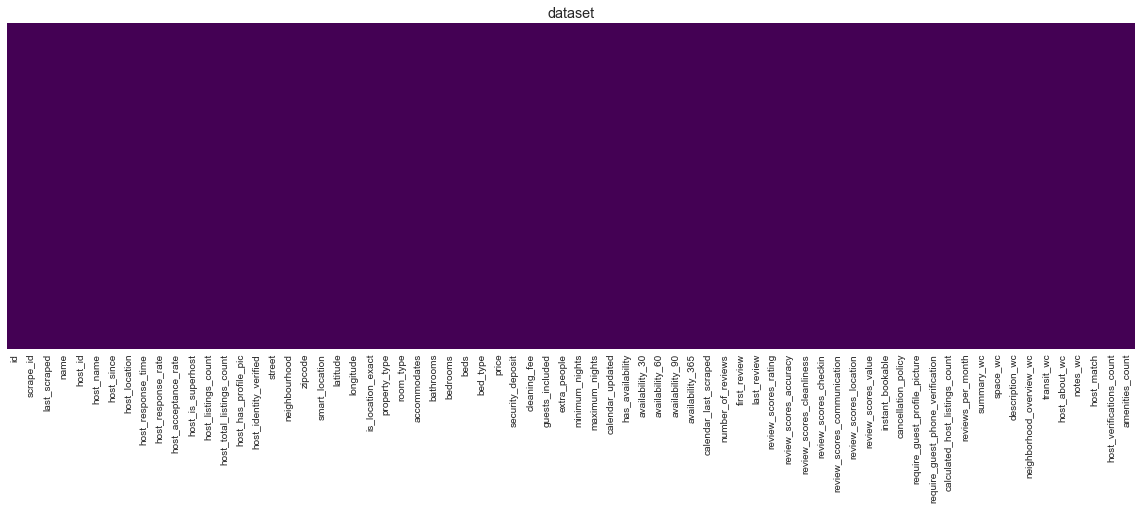

id : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
host_id : % 0 With 0 missing values
host_name : % 0 With 0 missing values
host_since : % 0 With 0 missing values
host_location : % 0 With 0 missing values
host_response_time : % 0 With 0 missing values
host_response_rate : % 0 With 0 missing values
host_acceptance_rate : % 0 With 0 missing values
host_is_superhost : % 0 With 0 missing values
host_listings_count : % 0 With 0 missing values
host_total_listings_count : % 0 With 0 missing values
host_has_profile_pic : % 0 With 0 missing values
host_identity_verified : % 0 With 0 missing values
street : % 0 With 0 missing values
neighbourhood : % 0 With 0 missing values
zipcode : % 0 With 0 missing values
smart_location : % 0 With 0 missing values
latitude : % 0 With 0 missing values
longitude : % 0 With 0 missing values
is_location_exact : % 0 With 0 missing values
property_type : % 0 With 0 missing

In [105]:
missing_heat_map(df)

In [106]:
#save to csv
df.to_csv('clean_airbnb.csv')

### Explatory data analysis

In [107]:
#read csv
c_df = pd.read_csv('clean_airbnb.csv')

In [108]:
#seperate the target
x = c_df
target = c_df['price']

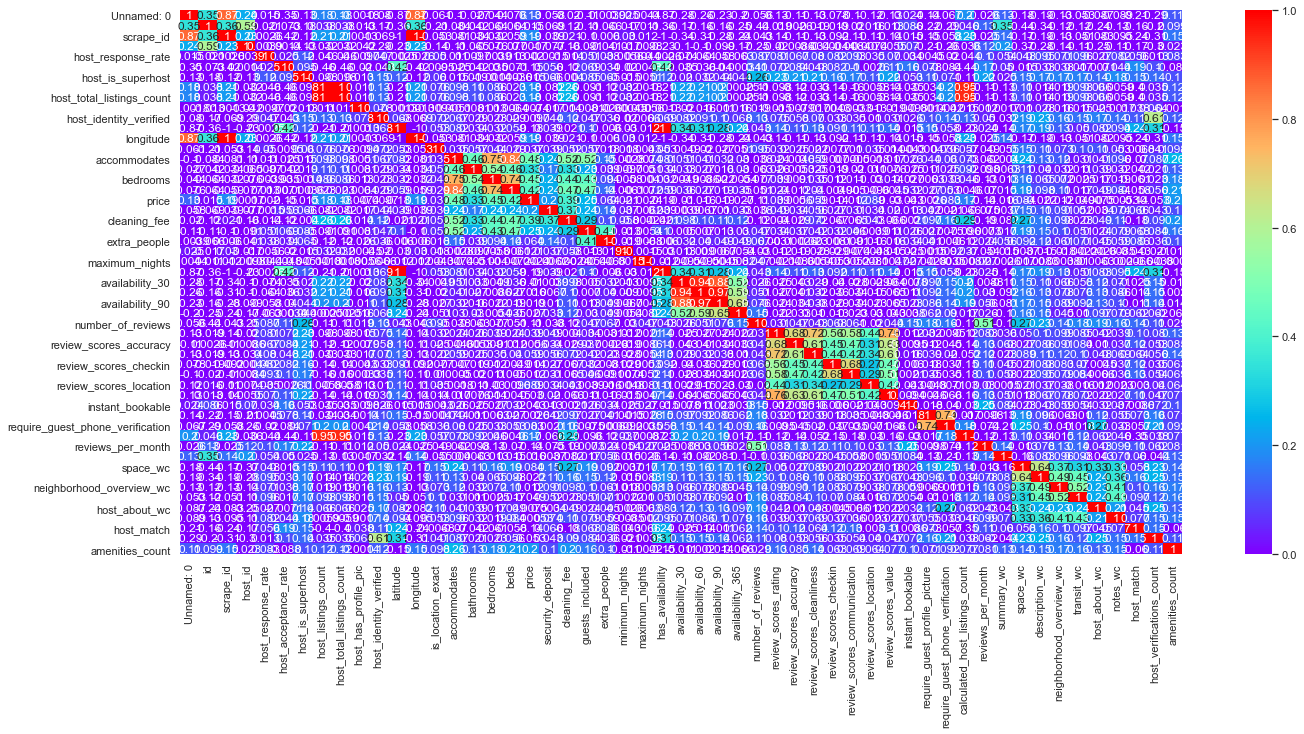

In [109]:
# get the overall coorelation map
plt.figure(figsize=(20,10))
corr=c_df.corr()
sns.set(font_scale=1)
sns.heatmap(corr,annot=True, vmin=0, vmax=1, cmap = 'rainbow')

In [110]:
#Grab a list of 10 best positive features based on pairwise correlation
best_feature_corr=c_df.corr()['price'].sort_values(ascending=False).index[0:10].tolist()
print('list of 20 best positive features based on pairwise correlation:\n',best_feature_corr)

list of 20 best positive features based on pairwise correlation:
 ['price', 'accommodates', 'bedrooms', 'beds', 'cleaning_fee', 'bathrooms', 'guests_included', 'amenities_count', 'security_deposit', 'longitude']


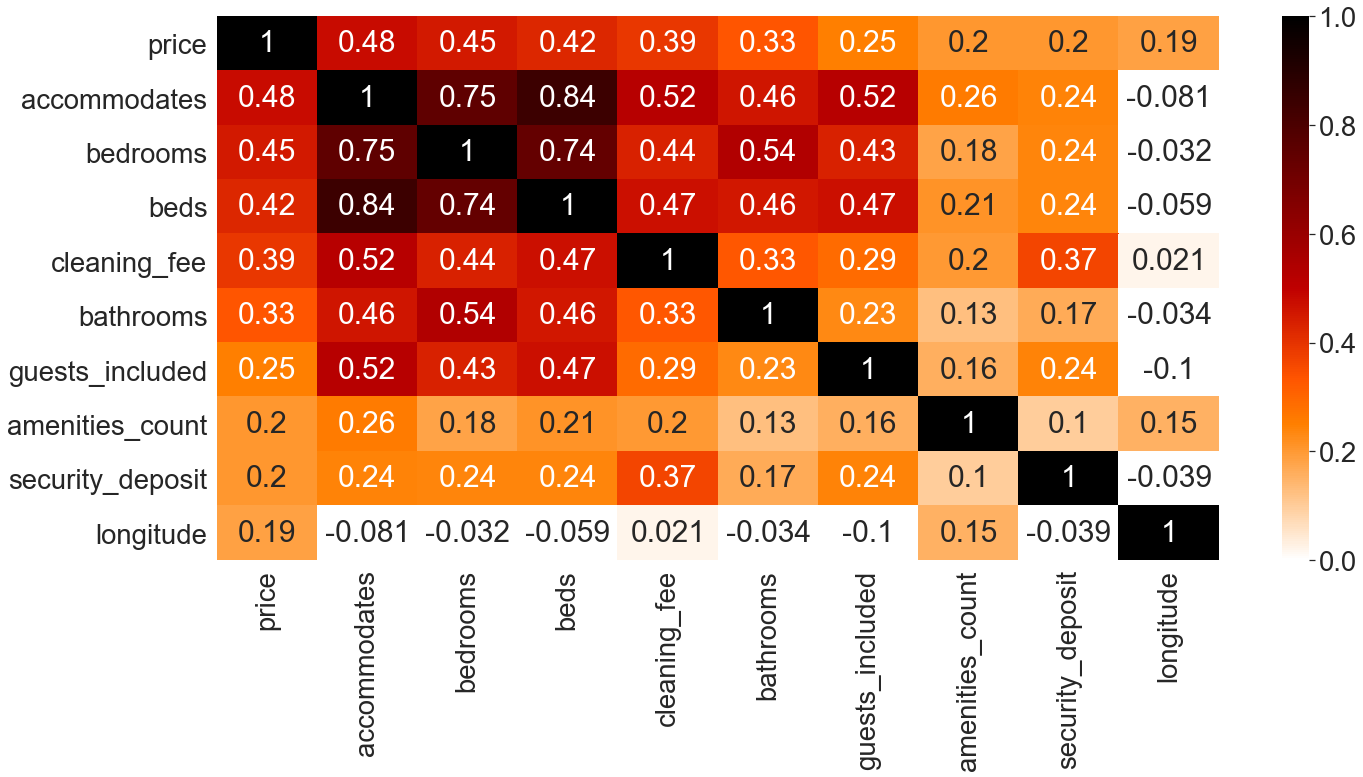

In [111]:
#getting the top 10 features corrilation
plt.figure(figsize=(20,10))
corr=c_df[best_feature_corr].corr()
sns.set(font_scale=2.5)
sns.heatmap(corr,annot=True, vmin=0, vmax=1, cmap = 'gist_heat_r')

**As shown above we can see that the features that have the highest correlation with the price are:-**

In [112]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = c_df.corr()[['price']]
def magnify():
    
    return [dict(selector="th",
                 props=[("font-size","7pt")]),
            dict(selector="td",
                 props=[('padding',"0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size","12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width','200px'),
                        ('font-size','12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,price
Unnamed: 0,0.13
id,0.02
scrape_id,0.19
host_id,0.00
host_response_rate,0.00
host_acceptance_rate,-0.15
host_is_superhost,-0.01
host_listings_count,0.18
host_total_listings_count,0.18
host_has_profile_pic,-0.01


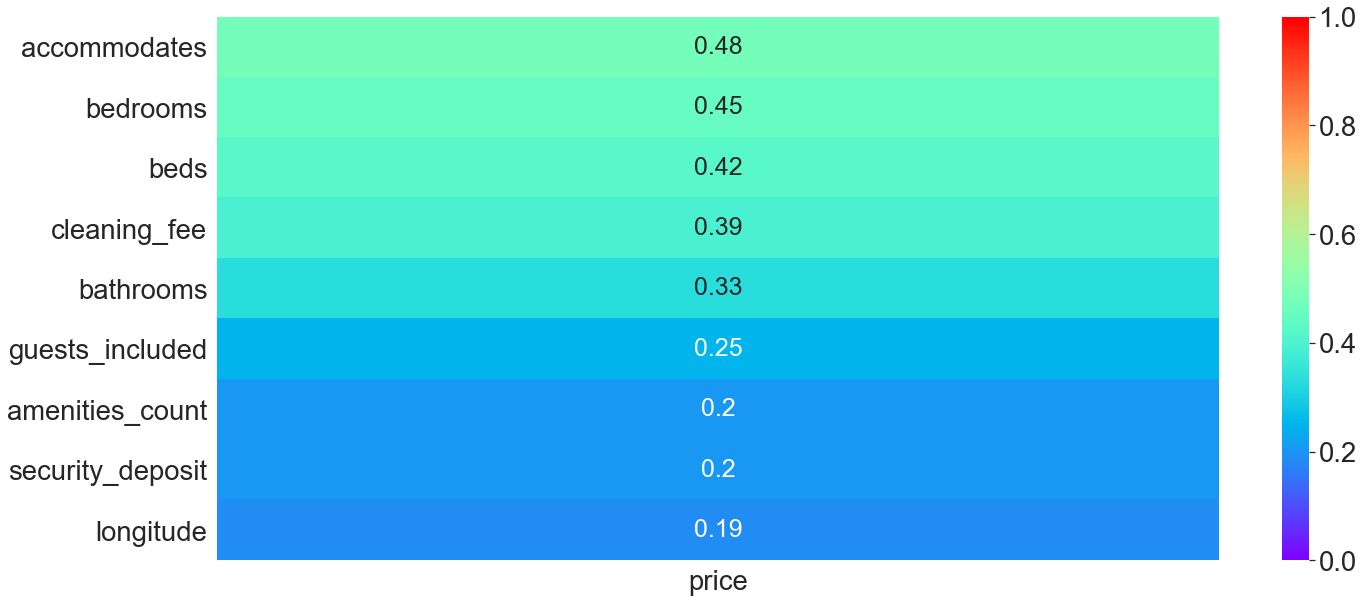

In [113]:
#getting the top 10 features corrilation with price
plt.figure(figsize=(20,10))
corr=c_df[best_feature_corr].corr()[['price']][1:10]
sns.set(font_scale=2.5)
sns.heatmap(corr,annot=True, vmin=0, vmax=1,annot_kws={"size": 25},cmap = 'rainbow')

In [114]:
# checking the negitive corralations (turns out to be unsignificant)
correlation = c_df.corr(method='pearson')
columns_smal = correlation.nsmallest(30,'price')[['price']].head(10)
columns_smal #Grabbing the largest corrilations (Neagitive)

,price
has_availability,-0.185172
latitude,-0.184161
host_acceptance_rate,-0.152711
reviews_per_month,-0.139660
host_match,-0.135758
number_of_reviews,-0.110149
host_verifications_count,-0.052746
transit_wc,-0.049306
instant_bookable,-0.042674
review_scores_value,-0.029752


In [117]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7403 non-null   int64  
 1   id                                7403 non-null   int64  
 2   scrape_id                         7403 non-null   int64  
 3   last_scraped                      7403 non-null   object 
 4   name                              7403 non-null   object 
 5   host_id                           7403 non-null   int64  
 6   host_name                         7403 non-null   object 
 7   host_since                        7403 non-null   object 
 8   host_location                     7403 non-null   object 
 9   host_response_time                7403 non-null   object 
 10  host_response_rate                7403 non-null   float64
 11  host_acceptance_rate              7403 non-null   float64
 12  host_i

In [129]:
#select the features to drop because it will intoduce a huge number of features when dummied 
features = ['first_review','last_review','calendar_last_scraped', 'calendar_updated',\
            'zipcode', 'street', 'host_location', 'host_since', 'host_name','host_name',\
            'host_id','name','last_scraped','scrape_id','id','Unnamed: 0','price']
select_features = [x for x in c_df.columns if x not in features] 
select_features 

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'smart_location',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'reviews_per_month',
 'summary_wc',
 

**Fix the data for modeling**

In [144]:
x = c_df[select_features] #specify the selected features as the x var 
y = c_df['price'] #make price the target 

In [145]:
# replace the object varibles to dummy varibles to apply to the model
x = pd.get_dummies(x,drop_first=True) #Converting the data into dummies to apply to models
x.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,...,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,96.0,100.0,0,3,3,1,1,47.636289,-122.371025,1,...,0,0,0,0,0,0,1,1,0,0
1,98.0,100.0,1,6,6,1,1,47.639123,-122.365666,1,...,0,0,0,0,0,0,1,0,1,0
2,67.0,100.0,0,2,2,1,1,47.629724,-122.369483,1,...,0,0,0,0,0,0,1,0,1,0
3,100.0,100.0,0,1,1,1,1,47.638473,-122.369279,1,...,0,0,0,0,0,0,1,0,0,0
4,100.0,100.0,0,2,2,1,1,47.632918,-122.372471,1,...,0,0,0,0,0,0,1,0,1,0


In [146]:
print(y.shape)
x.shape

(7403,)


(7403, 240)

In [147]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= .20 , shuffle = True)

In [152]:
print(x_train.shape,x_test.shape)

(5922, 240) (1481, 240)


In [150]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Call the StandardScaler
scaler.fit(x_train) #Fit x_train to the scaler

# transforming features 
x_train_ss = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_ss = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
print("scaled features are in 'x_train_ss' and 'x_test_ss'")
print((len(x_train_ss),len(x_test_ss)))

scaled features are in 'x_train_ss' and 'x_test_ss'
(5922, 1481)


### Modeling

In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [159]:
# LinearRegression
lm = LinearRegression()
lm.fit(x_train_ss,y_train)

print('Training Score :' , lm.score(x_train_ss,y_train))
print('testing Score :' , lm.score(x_test_ss,y_test))

Training Score : 0.4512162584812313
testing Score : -1.2027436887715307e+21


In [160]:
# ridge
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(x_train_ss, y_train)

print('Training Score :' , ridge_cv.score(x_train_ss , y_train))
print('testing Score :' , ridge_cv.score(x_test_ss,y_test))

Training Score : 0.4502508458327596
testing Score : 0.532067670396589


In [156]:
# lasso
lasso_alphas = np.arange(1,200, 0.5)
lasso_cv = LassoCV(cv=5,alphas=lasso_alphas)
lasso_cv.fit(x_train_ss, y_train)

print('Training Score :' , lasso_cv.score(x_train_ss , y_train))
print('testing Score :' , lasso_cv.score(x_test_ss,y_test))

Training Score : 0.43947330021603426
testing Score : 0.5300356077176186


In [161]:
forest_cv = RandomForestRegressor(n_jobs=-1)
forest_cv.fit(x_train_ss , y_train)

print('Train Score :' , forest_cv.score(x_train_ss , y_train))
print('testing Score :' , forest_cv.score(x_test_ss,y_test))

Train Score : 0.9176387348334479
testing Score : 0.46052590876699134


In [165]:
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(x_train_ss, y_train)
predicted_regr = ada.predict(x_train_ss)
print("Train Score:", ada.score( x_train_ss, y_train))
print('testing Score :' , ada.score(x_test_ss,y_test))

Train Score: -2.294215422775747
testing Score : -2.977958775033742


In [168]:
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15]}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, refit=True, verbose=1)
grid_knn.fit(x_train_ss, y_train)
print('Training Score :' , grid_knn.score(x_train_ss , y_train))
print('testing Score :' , grid_knn.score(x_test_ss,y_test))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished


Training Score : 0.40280634833820633
testing Score : 0.3767475927891313


In [172]:
from sklearn.metrics import r2_score
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(x_train_ss, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(x_train_ss)
y_test_preds = lm_model.predict(x_test_ss) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.45121673256448425.  The rsquared score on the test data was -8.58499196171714e+23.


In [115]:
# z = pd.get_dummies(c_df,drop_first=True) #Converting the data into dummies to apply to models
# z.head()

In [116]:
# correlation = z.corr(method='pearson')
# columns_larg = correlation.nlargest(30,'SalesPrice')[['SalesPrice']].head(30)
# columns_larg #Grabbing the largest corrilations (Positive)